Music Popularity

Table of Contents:
1. Problem Statement
2. Data Collection
3. Data Cleaning and Organizing
3. EDA
4. EDA Summary
5. Model
6. Model Evaluation
7. Conclusion
8. Follow ups/Next Steps



# 1. Problem Statement

A key component of marketing a product is being able to stand out in front of the 
masses. The best chance of having success is to make sure you get your message or product is presented in front of the most eyes as possible. Once that is done succesfully, the goal is to have potential customer interact with what you are offering and let the product's value speak for itself.

As a fan of all different types of music, I'm always excited to find new artist that I enjoy. When I'm interesting in finding new music as a consumer, I either rely on recommendations from music services (Pandora, Spotify, Soundcloud), or I manually search for music based on different features (genre, decade, friend's music tastes, geographic location, recording labels). 

With a large and saturated music landscape, many great artists are always unidentified or acknowledged. Trying to understand the other side for artists and music creators, are there certain things an artist can do to have his music identified or acknowledged. One key way an artist can get noticed is posting music online, then self-identifying what type of music they have created by linking it with genre and music-type tags. 

Knowing that a artist must add it's own tags to it's music, can we determine if there are certain tags that will help an artist gain "popularity" and "familiarity" with a fan base? Similarly, once an artist has captured a users attention by getting their music infront of their eyes and ready for a listen, can artist increease their chances of "popularity" and "familiarity" by capturing the user's interest by using certain words in the song's title or certain words in the song? 

Now, these  tactics are just ideas for an artist to increase his chances of someone listening to his music and putting him/herself in the best position to gain "popularity" and "familarity". The question of whether or not the person who listen's to the music enjoys it is all dependent on the quality of the musician and their product - the actual content and quality of the song.

# 2. Data Collection

The data I collected for this project consisted majorityly from the following resource, "The Million Song Data" challenge. For my work, I used a subset of the data (~10,000 songs) which included the song title, song unique identifier (UI), artist name, artist UI, album, album UI, song year, song duration, song popularity, and song familiarity. The popularity and familiarity features are continues variables that are defined from the source as:

Familiarity – this corresponds to how well known in artist is.  You can look at familiarity as the likelihood that any person selected at random will have heard of the artist.  Beatles have a familiarity close to 1, while a band like ‘Hot Rod Shopping Cart’ has a familiarity close to zero.

Hotttnesss – this corresponds to how much buzz the artist is getting right now. This is derived from many sources, including mentions on the web, mentions in music blogs, music reviews, play counts, etc.

The other main data points I looked at were as follows from the following site (http://labrosa.ee.columbia.edu/millionsong/) and the additional datasets available. For eachone, I was able to download the data into a database format onto my personal desktop. The combination of the data came from various collected sources (Echonest, Last.fm, musicXimatch). All the sources and downloadable links can be found here: http://labrosa.ee.columbia.edu/millionsong/pages/additional-datasets

As for the specifics of the data sets that I used, they go as follows:
+ Song Metadata - mentioned above. The main component of this data set is the "Familiarity" and "Popularity" scores (which was originally refered as "Hotttnesss"). Yes, the original data set had the title of "Hotttness" with three T's and three S's.
+ Genre - This dataset consists of a list of 16 different main genre's (Country, Jazz, Electronic, Rock, Hip-Hop, etcc...) and are all linked by a "track_id" key
+ Sub-Genre Term - This is an independent source of sub-genres that come from last.fm and are linked by a "artist_id" key. The way you can think of these tags is like a "hashtag". For each artist, there are related tags that could include genre, but also could include the language of the movie, the style of music, decade, or any other descriptive feature of the music. For example, "british" or "90's" could be a tag for the artist from this dataset. One of the tags could also be "Rock" or "Hip-Hop", so that's why I've classafied this data as more specific sub-genres rather than the other "Genre" datasets more encompassing fifeteen classifiers
+ Sub_Genre Mbtag - This dataset is very similar to the above "Sub-Genre Term" dataset but from another independent source, meaning it provides a little more variety into the tag descriptions and possibilities. This data set is also connected by a key "artist_id"
+ Lyrics - This dataset consists of a vecotrized and parsed set of lyrics for a sub-set of songs. For each song, there is the associated word and the count of how many times that word appears in the specific song. This dataset is organized on the key "track_id"

The ultimate goal of this data is to combine it in order to find items that could help potential artists as they create music and upload it to the internet. Only using a subset of the data, the main goal is to expand it to more data overtime

Note: For all the data, in order to make it easy for me to manipulate and analyize the data as one complete set, I needed to be able to look at it in verious formats. To do this, it would be easiest for me to compile the data into both long and wide formats. Most of the data that was received was in a long format, so alot of the data cleaning included manipulating it into a wide format. Similarly, in order to make it easy on myself for future dates, I made many combinations of the datasets (that is why I ended up exporting many various forms of the combined data).

# 3. Data Cleaning

In [411]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import patsy
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
###########################
import numpy as np
import scipy 
from scipy.interpolate import interp1d
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
# We are using the BernoulliNB version of Naive Bayes, which assumes predictors are binary encoded.
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.linear_model import LogisticRegressionCV

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve, auc

from nltk.corpus import stopwords

import enchant

from sklearn.feature_extraction.text import TfidfTransformer

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# Functions

In [372]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=10, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=10, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

def update_columns(col_names, label):
    new_names = []
    new_names.append(col_names[0])
    for name in col_names[1:]:
        name = label + name
        new_names.append(name)
    return new_names

def is_ascii(column):
    column_list = []
    for col in column:
        for letter in col:
            if ord(letter) > 128:
                column_list.append(col)
                continue
    return column_list

def del_cols(df):
    cols = list(df.columns.values)
    cols_del = []
    for x in cols:
        for ch in x:
            if ch not in 'abcdefghijklmnopqrstuvwxyz_0123456789-':
                cols_del.append(x)
                continue
    return cols_del

def del_cols_lyric(df):
    cols = list(df.columns.values)
    cols_del = []
    for x in cols:
        for ch in x:
            if ch not in 'abcdefghijklmnopqrstuvwxyz_-':
                cols_del.append(x)
                continue
    return cols_del

def del_stopwords(df):
    stop = stopwords.words('english')
    cols = list(df.columns.values)
    cols_del = []
    for x in cols:
        if x in stop:
            cols_del.append(x)
    return cols_del

def roc_curve_graph(model, X_test, y_test):

    # Get out the predicted probabilities for the X observation matrix
    y_pp = model.predict_proba(X_test)

    # roc_curve returns the false positive rate and true positive rates as the threshold changes
    # takes in the y and the predicted probabilities of the positive class from your model.
    fpr, tpr, _ = roc_curve(y_test, y_pp[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=[7,5])
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
    plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('Receiver operating characteristic curve', fontsize=20)
    plt.legend(loc="lower right")
    plt.show()

# Importing Data

In [5]:
conn_addf_art_term = sqlite3.connect('../../Capstone/MillionSongSubset/AdditionalFiles/subset_artist_term.db')
conn_addf_metadata = sqlite3.connect('../../Capstone/MillionSongSubset/AdditionalFiles/subset_track_metadata.db')
conn_lyric = sqlite3.connect('../../Capstone/mxm_dataset.db')

df_term_artist_mbtag = pd.read_sql("SELECT * FROM artist_mbtag", con=conn_addf_art_term)
df_term_artist_term = pd.read_sql("SELECT * FROM artist_term", con=conn_addf_art_term)
df_metadata_songs = pd.read_sql("SELECT * FROM songs", con=conn_addf_metadata)
df_lyric_lyrics = pd.read_sql("SELECT * FROM lyrics", con=conn_lyric)
df_genre = pd.read_csv('../../Capstone/genre.csv')

# Cleaning/Combinging lyric Data

In [52]:
#Drop the "is_test" column from the dataset because it adds no value to anything that will
#be analyzed
df_lyric_lyrics.drop('is_test', axis=1, inplace=True)

In [9]:
# Putting the lyric dataset into a wide format so each song is represented in a single row
# thus meaning that each count of a word is represented for a song in a single row
df_lyric_lyrics_wide = df_lyric_lyrics.pivot_table(index='track_id', 
                                                   columns='word', 
                                                   values='count',
                                                    fill_value=0).reset_index()

In [ ]:
# Create a new dataframe that combines the individual song metadata with the lyric data in the
# wide format
df_lyric_metadata = pd.merge(df_metadata_songs, 
                             df_lyric_lyrics_wide, 
                             how='inner', 
                             on='track_id')

# Cleaning/Combining Genre Data

In [48]:
# Convert the genre dataframe into its wide format (based on the track_id)
df_genre['genre_value'] = df_genre['genre_A'].map(lambda x: 1 if type(x) == str else 0)
df_genre_wide = df_genre.pivot_table(index='track_id', 
                                     columns='genre_A', 
                                     values='genre_value',
                                    fill_value=0).reset_index()

In [ ]:
# Rename the genre labels so that they all have an underscore rather than a space in the titles
df_genre_wide.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

In [ ]:
# Combine the above lyric metat data (the combination of the song_metadata and the wide
# format of the lyric data). By combining this data, there is now one complete dataset that
# looks at genre, lyrics, and song_metatdata that has popularity and familiarity scores for 
# every available song

# One issue with this is that the number of songs that are in this data set is much smaller than 
# the original amount because some of the data is lost in the combination process
df_lyric_genre_metadata = pd.merge(df_lyric_metadata, df_genre_wide, how='inner', on='track_id')

# Cleaning "Mbtag" Sub-Genre Data

In [12]:
# Convert the tag dataframe into its wide format and display the count of genres
# from the mbtag resource (based on artist_id)
df_term_artist_mbtag['values'] = 1
df_term_artist_mbtag_wide = df_term_artist_mbtag.pivot_table(index='artist_id', 
                                          columns='mbtag', 
                                          values='values',
                                          fill_value=0).reset_index()

In [13]:
df_mbtag_values = df_term_artist_mbtag.groupby('mbtag').agg({'values':np.sum}).sort_values(by='values', ascending=False).reset_index()

In [19]:
df_mbtag_values.shape

(726, 2)

In [17]:
df_mbtag_values.describe()

,values
count,726.000000
mean,5.246556
std,16.038697
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,192.000000


In [23]:
df_mbtag_values.head()

,mbtag,values
0,american,192
1,classic pop and rock,171
2,rock,166
3,british,122
4,rock and indie,119


In [24]:
df_mbtag_values.tail()

,mbtag,values
721,indie folk,1
722,b00138f5lm,1
723,indian,1
724,in flames,1
725,香港歌手,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x134637a50>]], dtype=object)

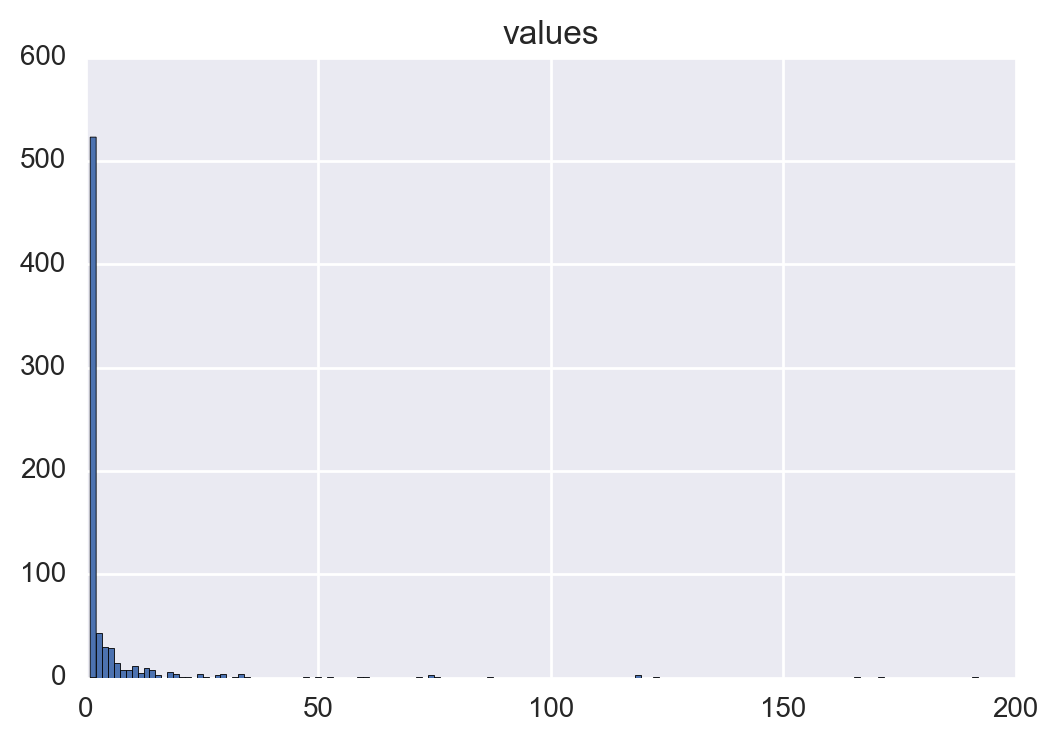

In [18]:
df_mbtag_values.hist(bins=150)

In [21]:
# Take the middle 50% around the mean of the column values (one standard deviation from the mean) - in order
# to pick features that are more unique across the various artists.
cols = list(df_term_artist_mbtag_wide.columns.values)
cols_use, cols_del = [], []
for x in cols:
    if (df_term_artist_mbtag_wide[x].sum() >= 3 and df_term_artist_mbtag_wide[x].sum() <= 7) or x == 'artist_id':
        cols_use.append(x)
    else:
        cols_del.append(x)

In [26]:
# These will be the kept features from this "Mbtag" genere data.
print len(cols_use)
print len(cols_del)

117
610


In [ ]:
# Drop the unwanted columns from the table (that are not in the "cols_use" list)

# I basically decided to cut off the ends of both sides of the distribution of the count of
# each tag from the dataset. This is for the purpose of making sure I'm not picking any tags
# that represent one song or an outlier. For example, the band Weeezer has a tag representing
# them in the dataset as a tag. Using this tag would be a bad indicator or feature for other
# artists or songs and is too specific. This is true for any other tags that might be too
# specific like "90's drama tv show music"

# On the other side of the distribution are the most common terms. These are too common and
# will dominate any type of modeling. The goal is to get a wide and common representation
# that won't overfit any data and could potentially be used in future dates

df_term_artist_mbtag_wide = df_term_artist_mbtag_wide.drop(cols_del, axis=1)

In [ ]:
# Clean and Add an indicator that these tags came from the Mbtag dataset. These tags will be combined
# with the term tag dataset, so it's good to know the oirign of the various tags
df_term_artist_mbtag_wide.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df_term_artist_mbtag_wide.columns = update_columns(df_term_artist_mbtag_wide.columns, 'mbtag_')

# Cleaning "Term" Sub-Genre Data

The process for cleaning this data set is very similar to the above "Mbtag" data set. The goal is to take out some of the noise of the available song specific tags. I do this in the same way by converting the data to it's wide format then looking at the distribution of the count of the tags

Again, the goal is to combine these tags with the above "Mbtag" into one data set, so I want to have the ability to find the most valuable and influential tags for the available song dataset and identify the source for each tag

In [27]:
###Convert the term dataframe into its wide format and show the sum of the 
df_term_artist_term['values'] = 1
df_term_artist_term_wide = df_term_artist_term.pivot_table(index='artist_id',
                                                     columns='term',
                                                     values='values',
                                                     fill_value=0).reset_index()

In [28]:
# There are lot more tags & features for the "term" dataset than the above "Mbtag dataset"
df_term_artist_term_wide.shape

(3885, 3503)

In [29]:
df_term_values = df_term_artist_term.groupby('term').agg({'values':np.sum}).sort_values(by='values', ascending=False).reset_index()

In [30]:
df_term_values.head()

,term,values
0,rock,2346
1,pop,1876
2,electronic,1709
3,jazz,1239
4,united states,1184


In [31]:
df_term_values.tail()

,term,values
3497,holland,1
3498,progressive gothic metal,1
3499,progressive folk rock,1
3500,homestead records,1
3501,japanese hardcore,1


In [32]:
df_term_values.describe()

,values
count,3502.000000
mean,27.839235
std,105.818209
min,1.000000
25%,1.000000
50%,3.000000
75%,11.000000
max,2346.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x13cfbb450>]], dtype=object)

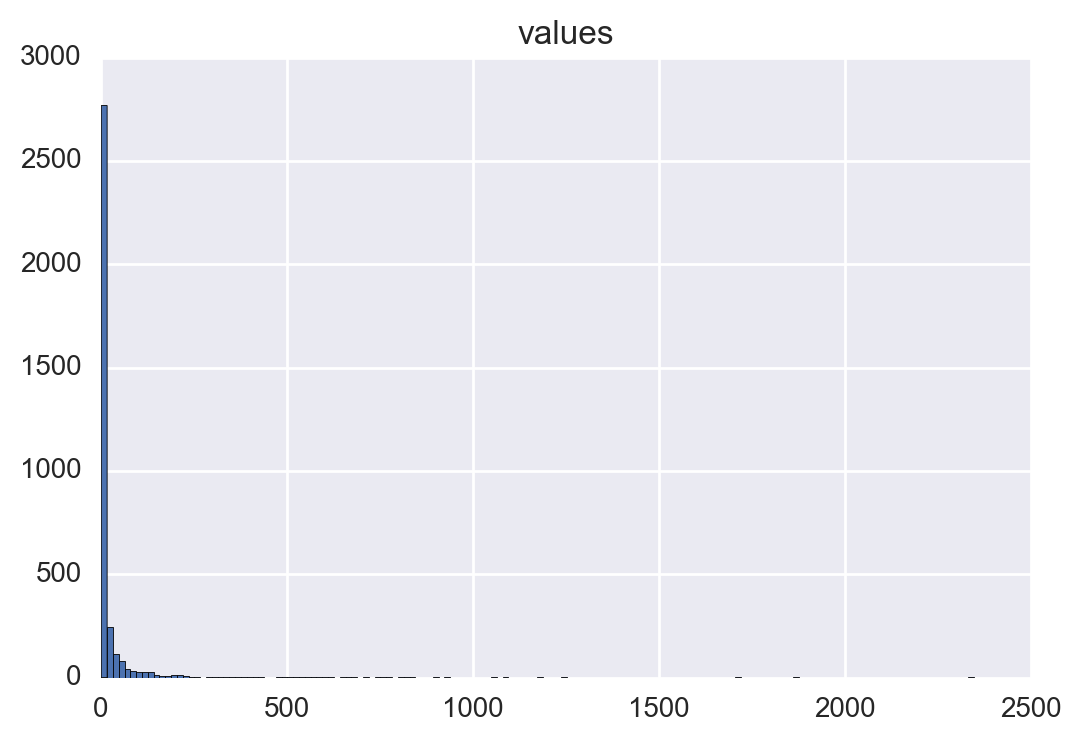

In [33]:
df_term_values.hist(bins=150)

In [34]:
# Took only the summation of the terms that were around the mean and then
# roughly a half standard deveation from the mean. Dwindled it down and rounded for this
# dataset because it had a lot more features from the beginning, so trying to reduce as
# much possible noise in the pre-processing phase
cols = list(df_term_artist_term_wide.columns.values)
cols_use, cols_del = [], []
for x in cols:
    if (df_term_artist_term_wide[x].sum() >= 24 and df_term_artist_term_wide[x].sum() <= 30) or x == 'artist_id':
        cols_use.append(x)
    else:
        cols_del.append(x)

In [35]:
print len(cols_use)
print len(cols_del)

95
3408


In [ ]:
# Drop the unwanted tags
df_term_artist_term_wide = df_term_artist_term_wide.drop(cols_del, axis=1)

In [ ]:
# Clean up the columns and identify them with the "term" title in order to know the 
# original data source
df_term_artist_term_wide.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df_term_artist_term_wide.columns = update_columns(df_term_artist_term_wide.columns, 'term_')

# Combine the two sub-genre datasets

In [ ]:
#All sub-genre dataframe
df_sub_genre = pd.merge(df_term_artist_mbtag_wide, df_term_artist_term_wide, how='inner', on='artist_id')

# Combine the sub-genre data to the song metadata

In [ ]:
# Combine to song_meta data
df_sub_genre_metadata = pd.merge(df_metadata_songs, df_sub_genre, how='inner', on='artist_id')

# Output the Data into a CSV Format

In [ ]:
#Outputs into CSV format
df_lyric_metadata.to_csv('df_lyric_metadata.csv', encoding='utf-8')
df_lyric_genre_metadata.to_csv('df_lyric_genre_metadata.csv', encoding='utf-8')
df_genre_wide.to_csv('df_genre_wide.csv', encoding='utf-8')
df_term_artist_mbtag_wide.to_csv('df_term_artist_mbtag_wide.csv', encoding='utf-8')
df_term_artist_term_wide.to_csv('df_term_artist_term_wide.csv', encoding='utf-8')
df_sub_genre.to_csv('df_sub_genre.csv', encoding='utf-8')
df_sub_genre_metadata.to_csv('df_sub_genre_metadata.csv', encoding='utf-8')
df_term_artist_mbtag.to_csv('df_mbtag_og.csv', encoding='utf-8')
df_term_artist_term.to_csv('df_term_og.csv', encoding='utf-8')
df_metadata_songs.to_csv('df_songs_og.csv', encoding='utf-8')
df_lyric_lyrics.to_csv('df_lyric_og.csv', encoding='utf-8')
df_genre.to_csv('df_genre_og.csv', encoding='utf-8')

# Load Data & Final Cleaning

In [59]:
# Original dataframes (in their long format):
df_mbtag_og = pd.read_csv('../Capestone/df_mbtag_og.csv')
df_term_og = pd.read_csv('../Capestone/df_term_og.csv')
df_songs_og = pd.read_csv('../Capestone/df_songs_og.csv')
df_lyric_og = pd.read_csv('../Capestone/df_lyric_og.csv')
df_genre_og = pd.read_csv('../Capestone/df_genre_og.csv')

In [60]:
# Combined dataframes:

#Combined data set on lyrics and genres (no sub-genres in the data set)
df_lyric_comb = pd.read_csv('../Capestone/df_lyric_genre_metadata.csv')

#Combined data with sub-genres (no lyrics in the data set)
df_tags_comb = pd.read_csv('../Capestone/df_sub_genre_metadata.csv')

###Original datasets
df_lyric_metadata = pd.read_csv('../Capestone/df_lyric_metadata.csv')
df_genre_wide = pd.read_csv('../Capestone/df_genre_wide.csv') #key is 'track_id'

#Original sub-genre/tag datasets
df_mbtag = pd.read_csv('../Capestone/df_term_artist_mbtag_wide.csv') #key is 'artist_id'
df_term = pd.read_csv('../Capestone/df_term_artist_term_wide.csv') #key is 'artist_id'
#Combined sub-genre/tag dataset
df_sub_genre = pd.read_csv('../Capestone/df_sub_genre.csv') #key is 'artist_id'

In [73]:
# Clean uneeded columns
df_mbtag_og = df_mbtag_og.drop('Unnamed: 0', axis=1)
df_term_og = df_term_og.drop('Unnamed: 0', axis=1)
df_songs_og = df_songs_og.drop('Unnamed: 0', axis=1)
df_lyric_og = df_lyric_og.drop('Unnamed: 0', axis=1)
df_genre_og = df_genre_og.drop('Unnamed: 0', axis=1)
df_lyric_comb = df_lyric_comb.drop('Unnamed: 0', axis=1)
df_tags_comb = df_tags_comb.drop('Unnamed: 0', axis=1)
df_lyric_metadata = df_lyric_metadata.drop('Unnamed: 0', axis=1)
df_genre_wide = df_genre_wide.drop('Unnamed: 0', axis=1)
df_mbtag = df_mbtag.drop('Unnamed: 0', axis=1)
df_term = df_term.drop('Unnamed: 0', axis=1)
df_sub_genre = df_sub_genre.drop('Unnamed: 0', axis=1)

# 4. Exploritory Data Analysis (EDA)

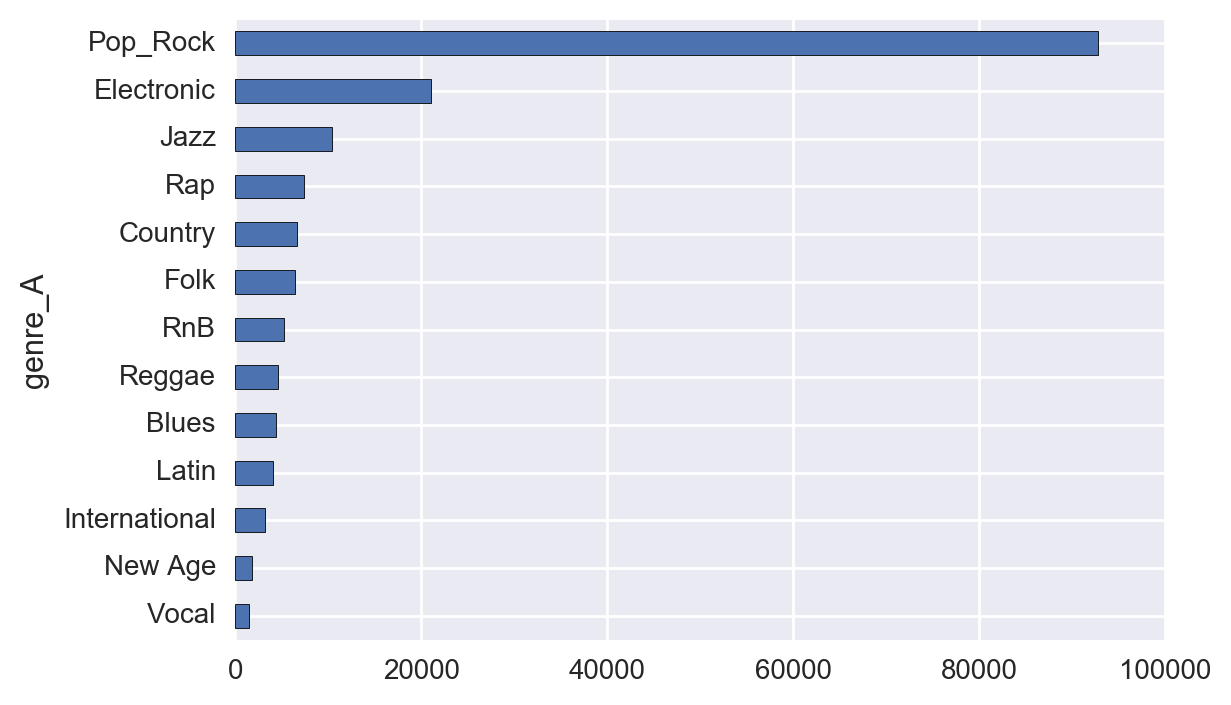

In [87]:
df_genre_og.groupby('genre_A')['genre_value'].sum().sort_values().plot(kind="barh")

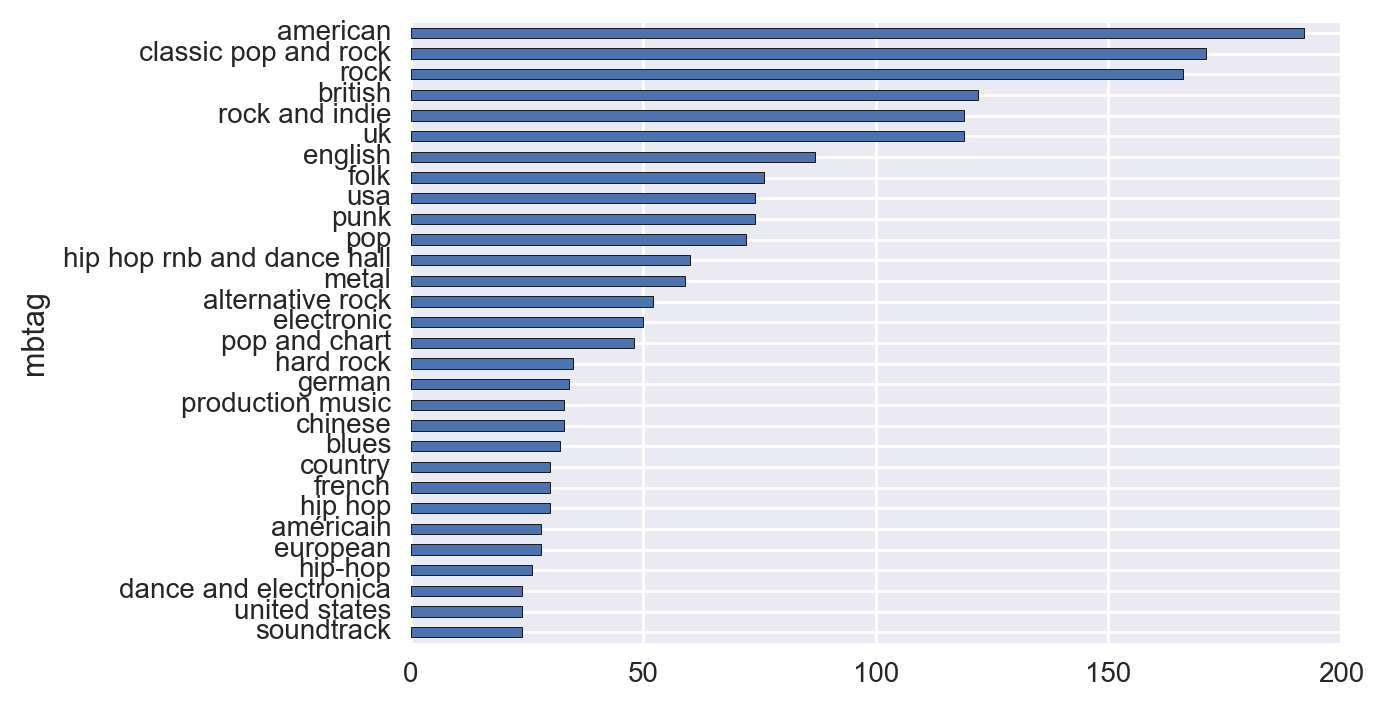

In [83]:
df_mbtag_og.groupby('mbtag')['values'].sum().sort_values(ascending=True).tail(30).plot(kind="barh")

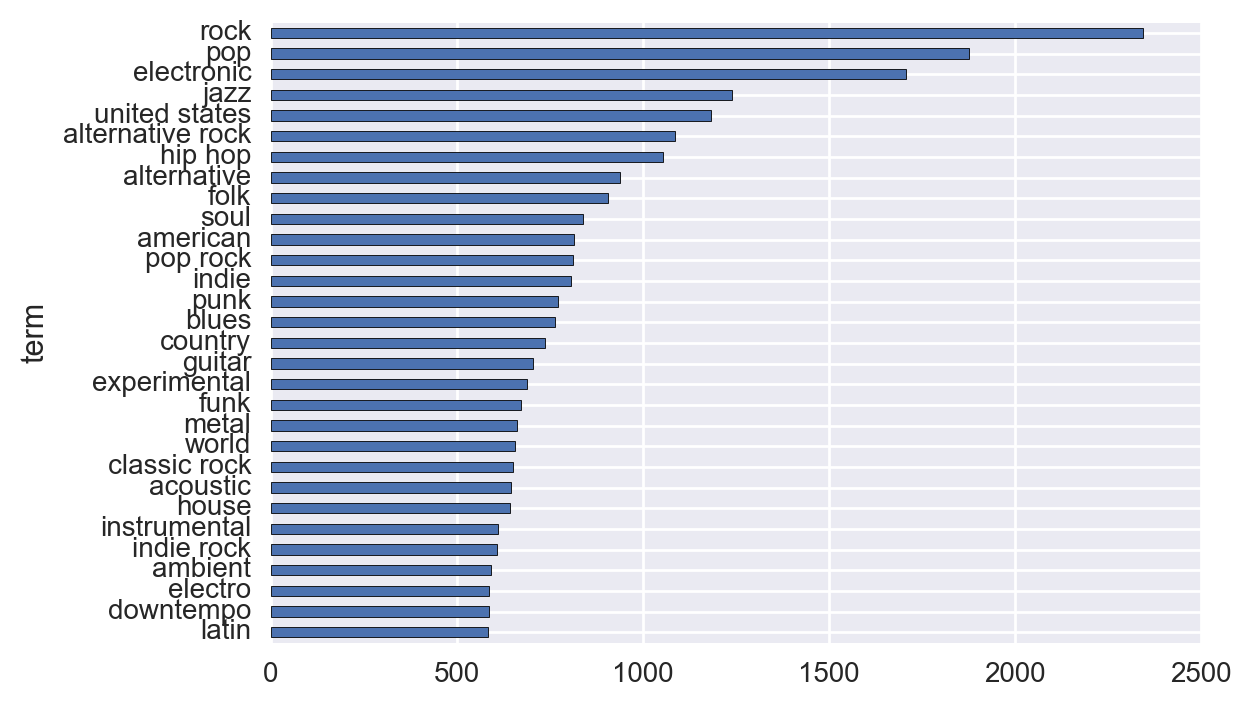

In [84]:
df_term_og.groupby('term')['values'].sum().sort_values(ascending=True).tail(30).plot(kind="barh")

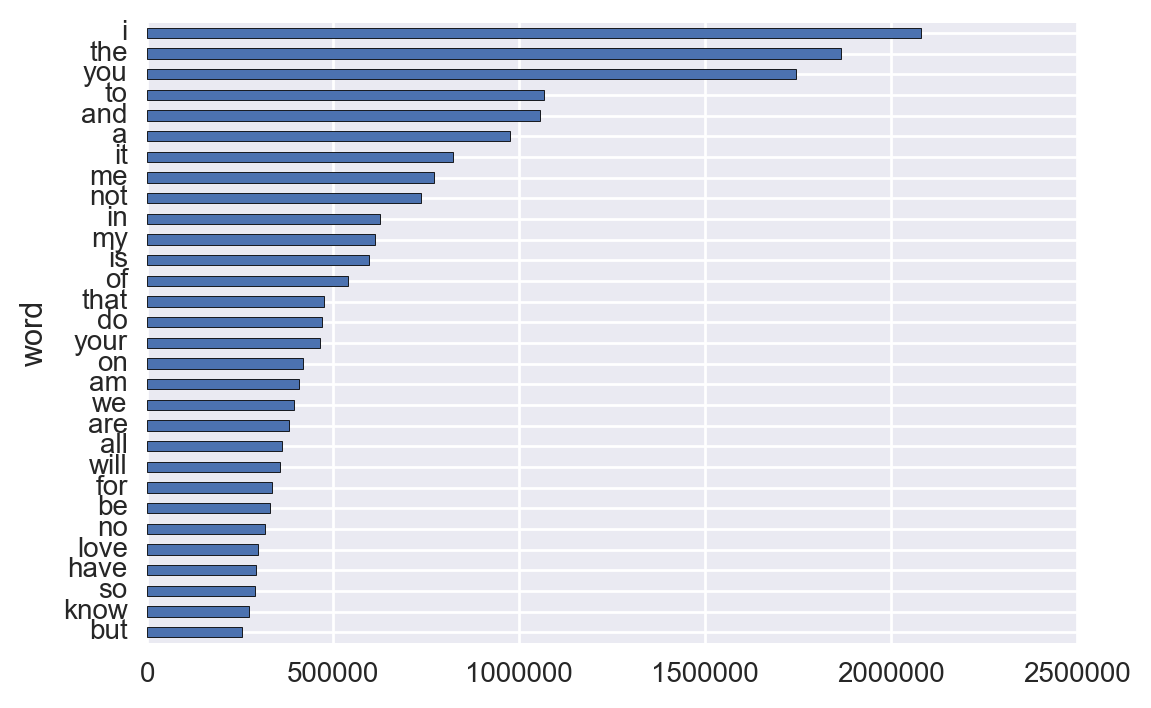

In [74]:
#Look into exploration of the lyrics dataframe
df_lyric_og.groupby('word')['count'].sum().sort_values().tail(30).plot(kind="barh")

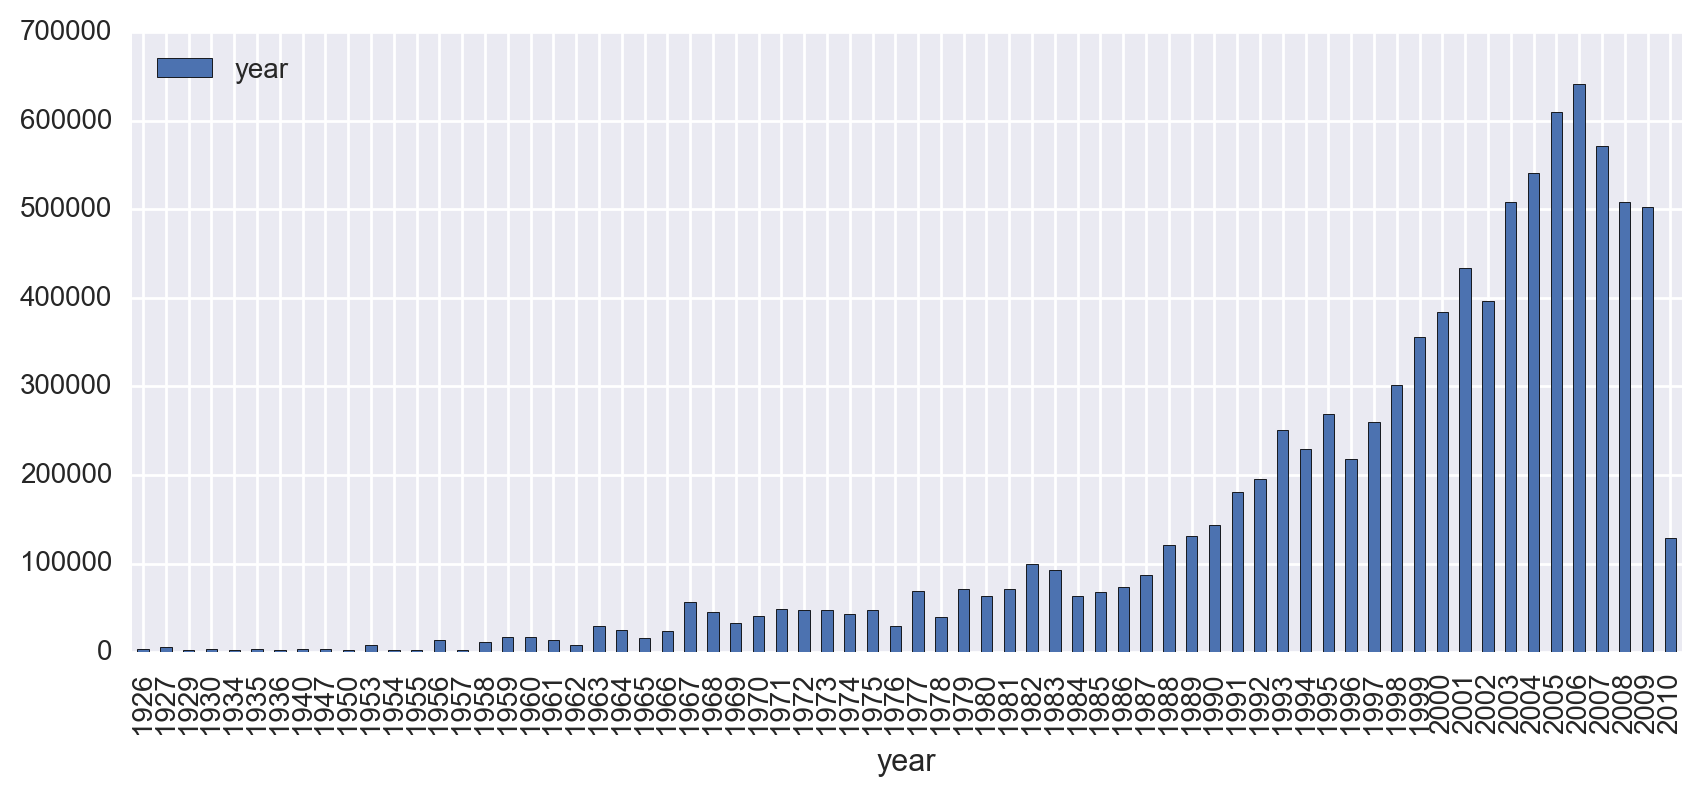

In [80]:
df_year = df_songs_og[(df_songs_og['year'] != 0)]
df_year.groupby('year').agg({'year':np.sum}).plot(kind='bar', figsize=(10,4))

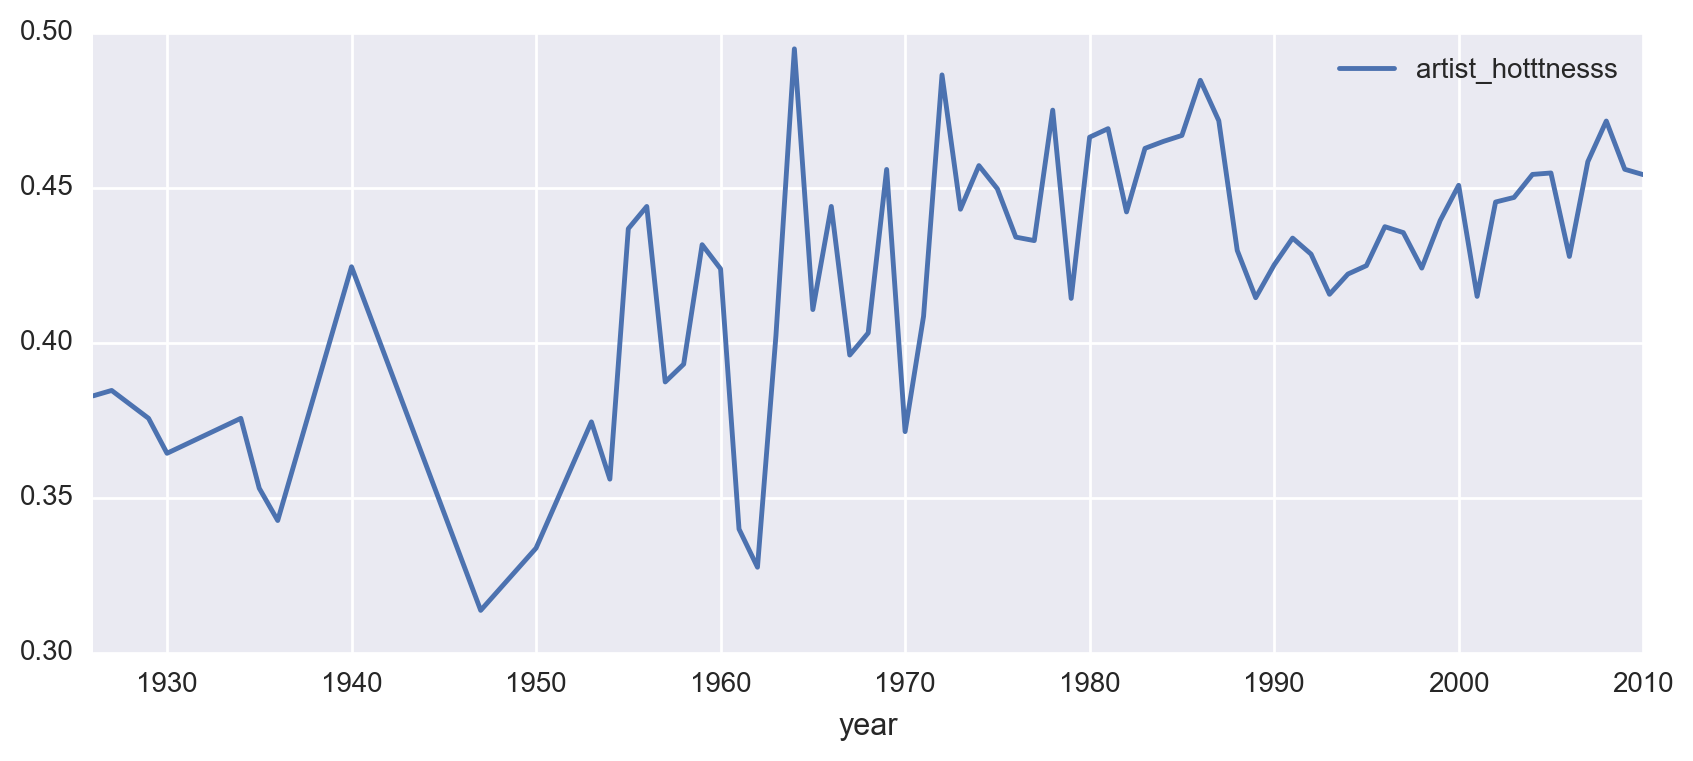

In [96]:
df_year.groupby('year').agg({'artist_hotttnesss':np.mean}).plot(kind='line', figsize=(10,4))

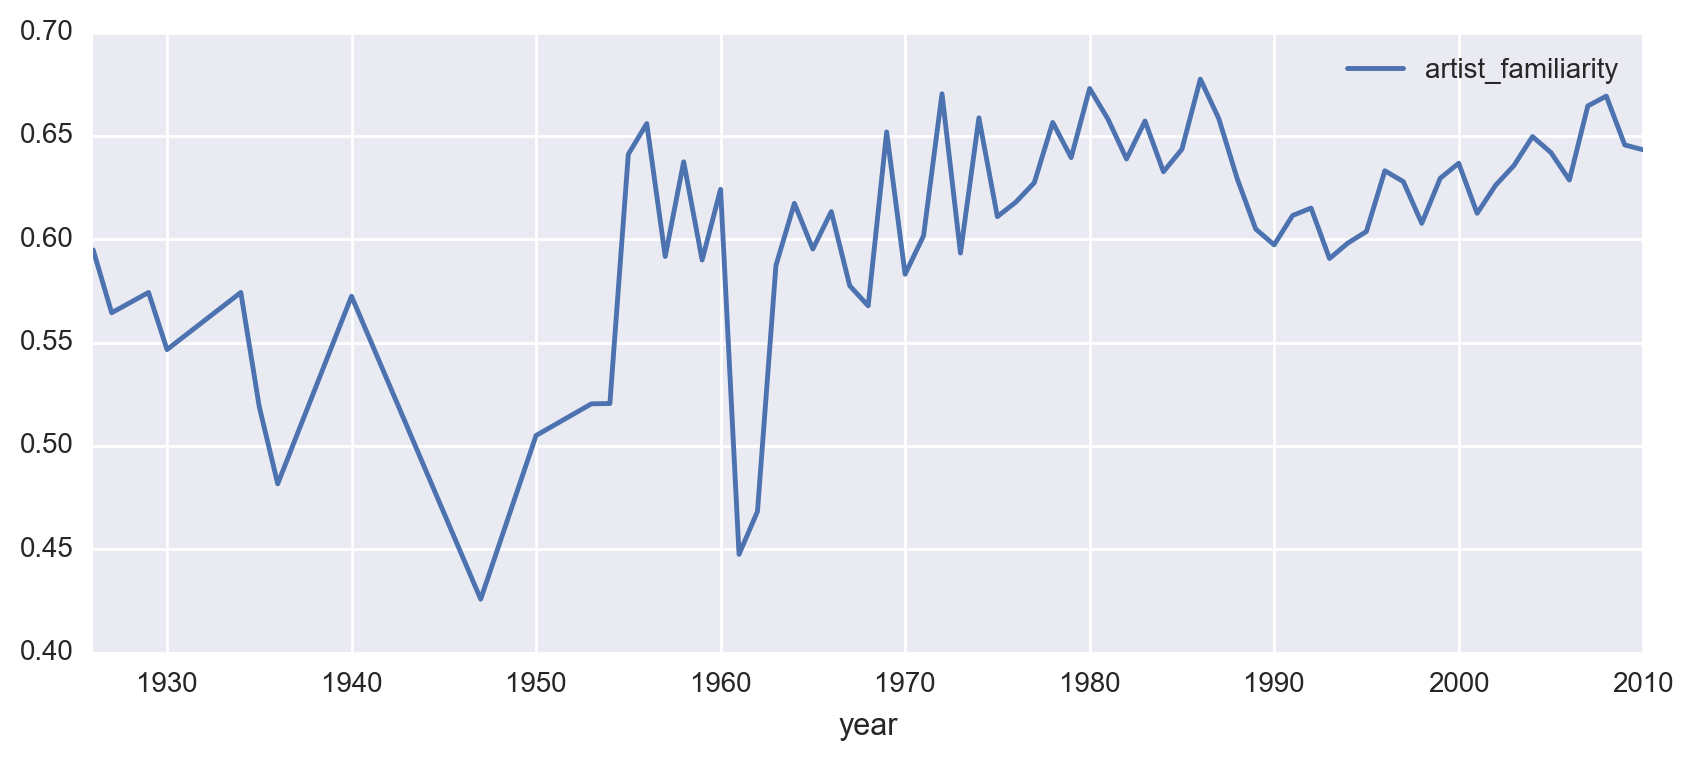

In [97]:
df_year.groupby('year').agg({'artist_familiarity':np.mean}).plot(kind='line', figsize=(10,4))

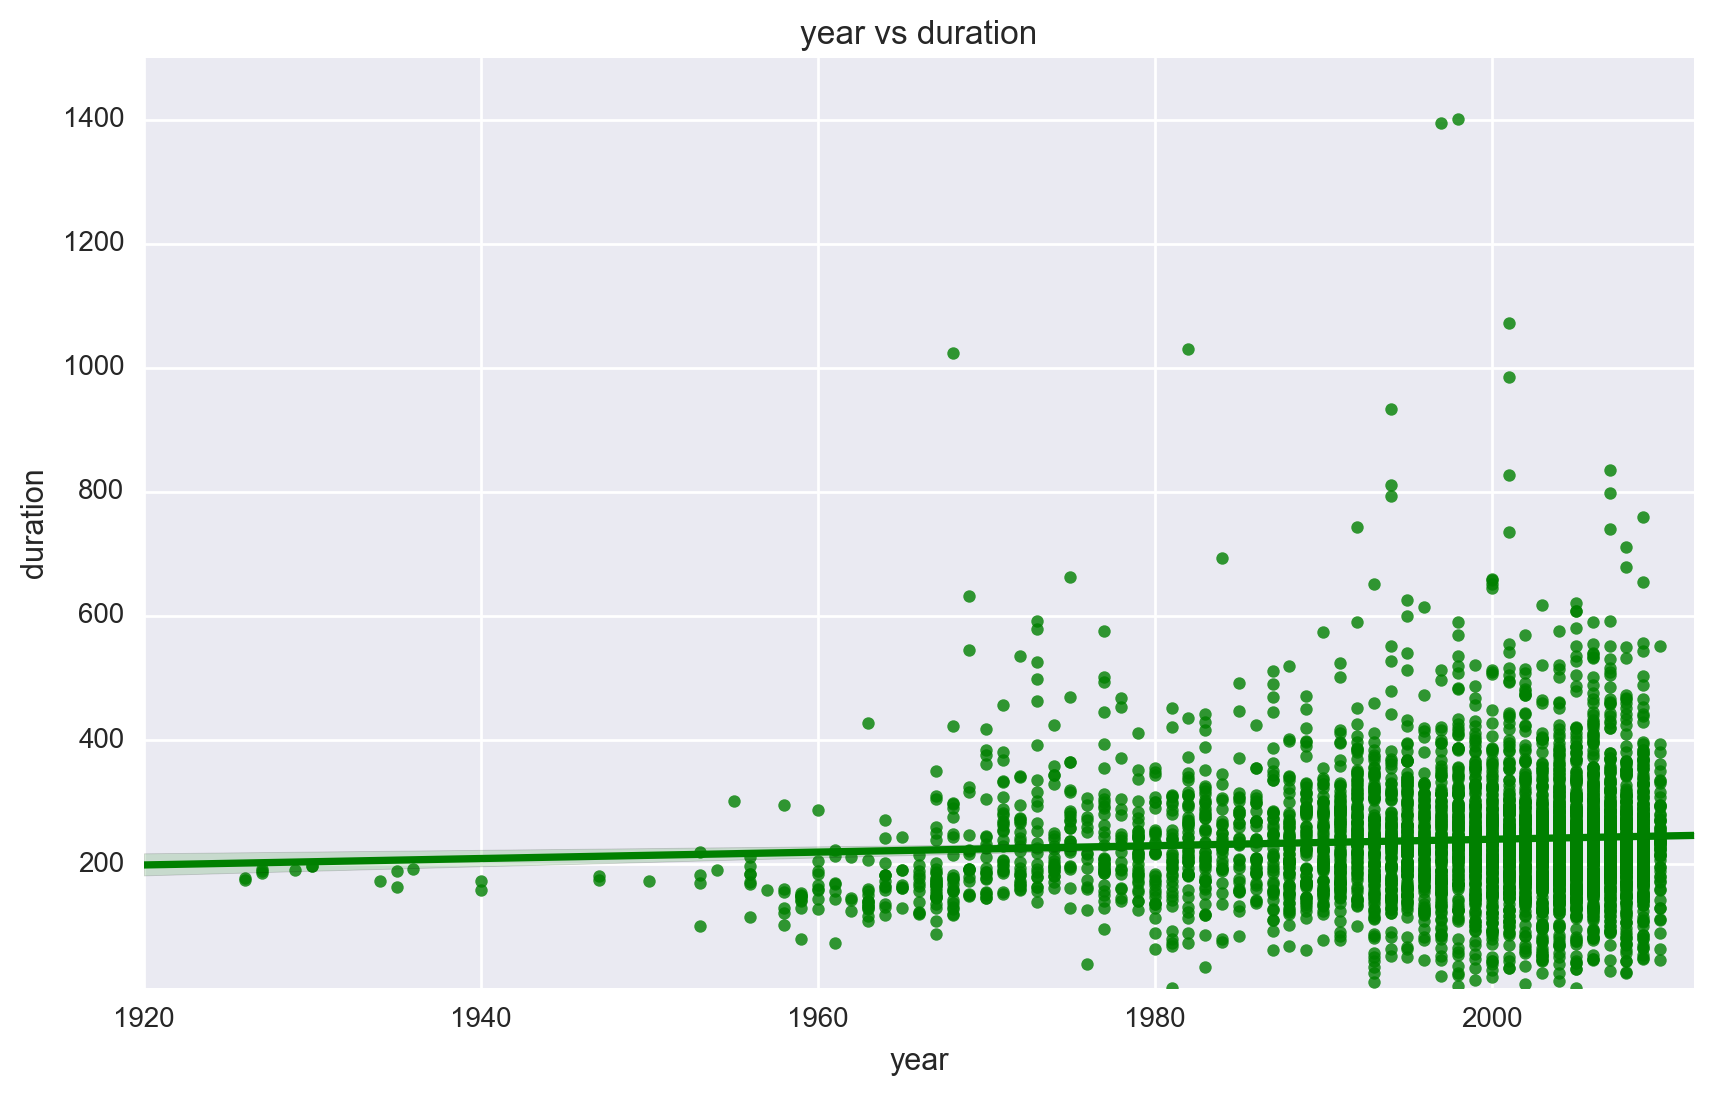

In [136]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = sns.regplot(x="year", y="duration", data=df_year, fit_reg=True, color='green')
ax.set_title('year vs duration')
ax.set_ylim([1,1500])
ax.set_xlim([1920, 2012])
plt.show()

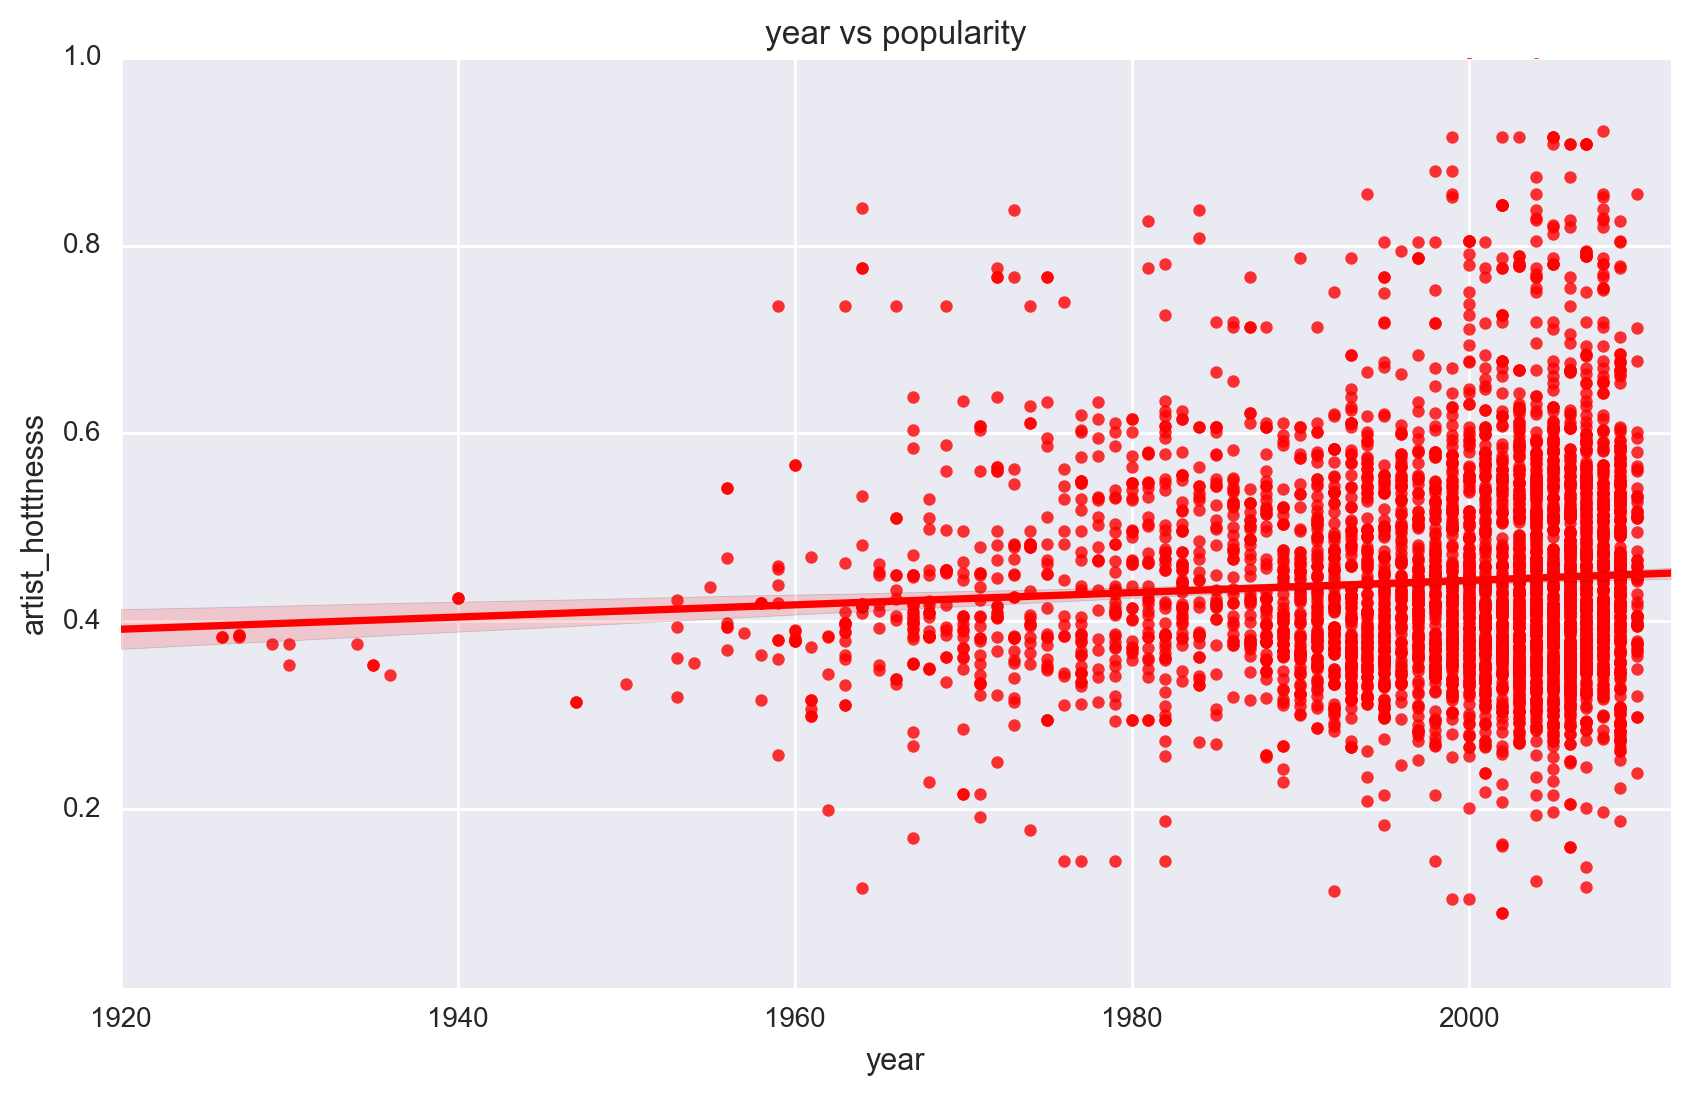

In [132]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = sns.regplot(x="year", y="artist_hotttnesss", data=df_year, fit_reg=True, color='red')
ax.set_title('year vs popularity')
ax.set_ylim([0.01,1])
ax.set_xlim([1920, 2012])
plt.show()

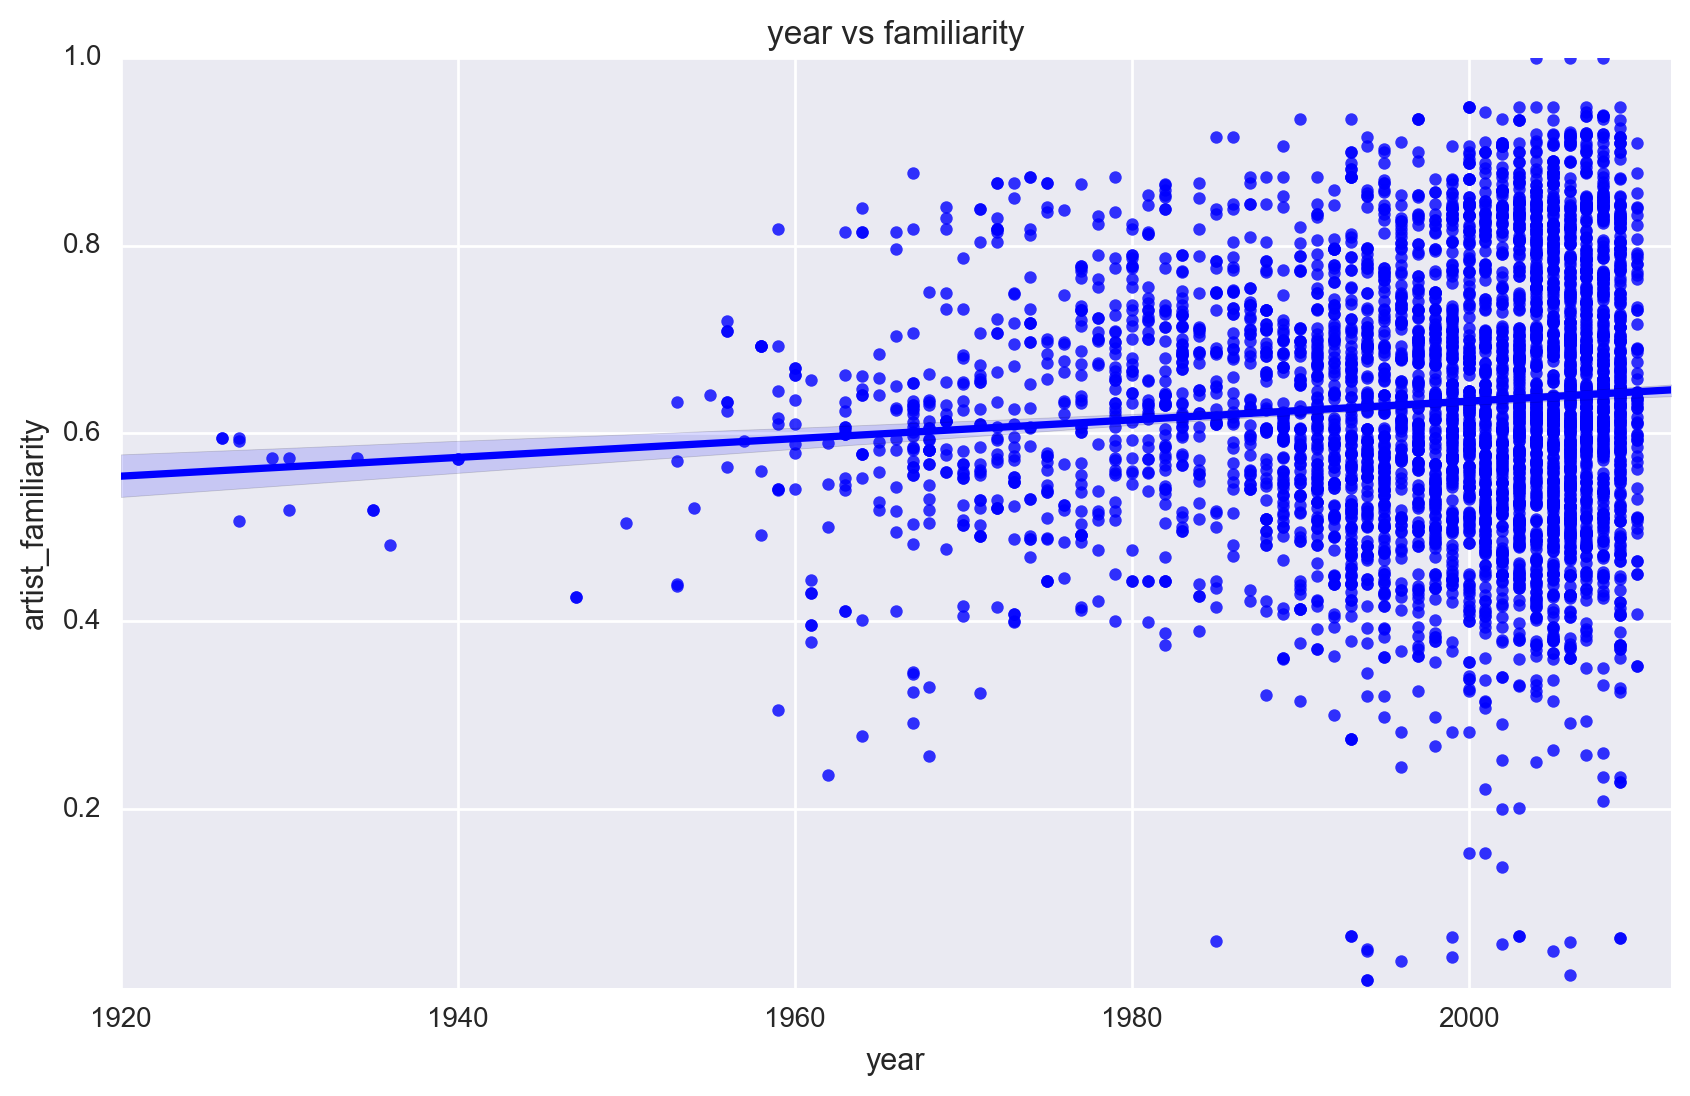

In [133]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax = sns.regplot(x="year", y="artist_familiarity", data=df_year, fit_reg=True, color='blue')
ax.set_title('year vs familiarity')
ax.set_ylim([0.01,1])
ax.set_xlim([1920, 2012])
plt.show()

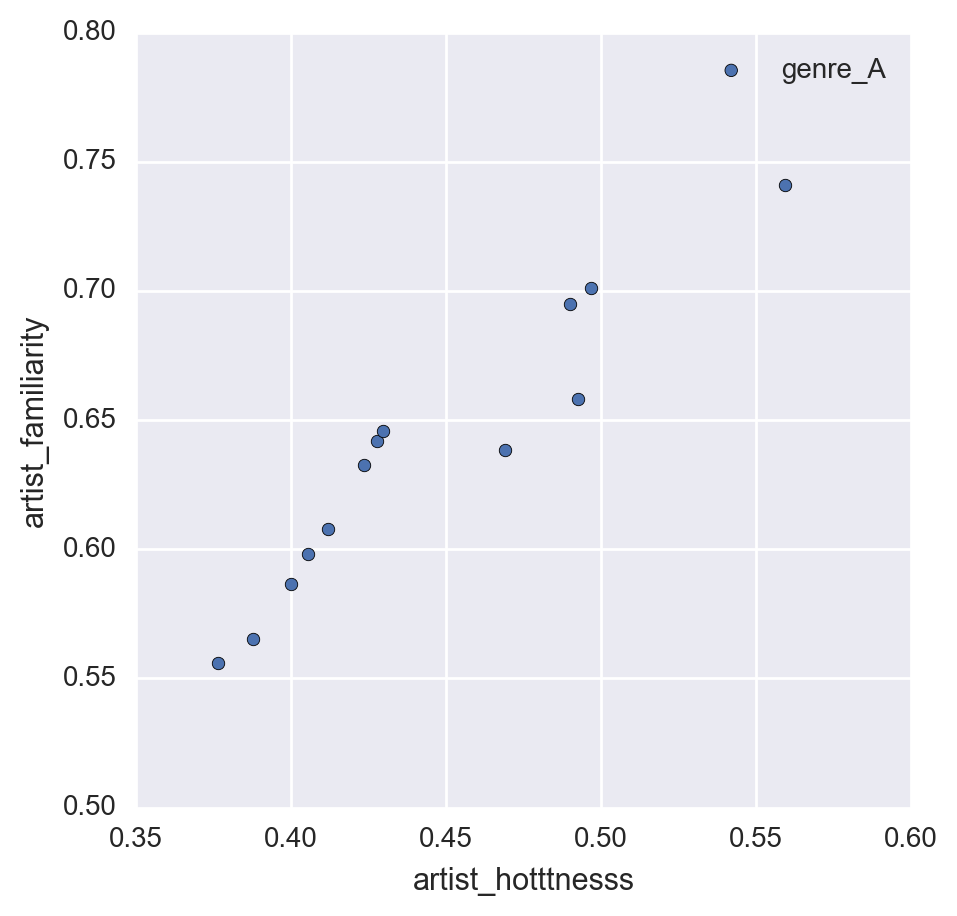

In [117]:
df_genre_scatter = df_song_and_genre.groupby('genre_A').agg({'artist_familiarity':np.mean, 'artist_hotttnesss':np.mean}).reset_index()
df_genre_scatter.plot(kind='scatter', x='artist_hotttnesss', y='artist_familiarity', figsize=(5,5), label='genre_A')

In [123]:
df_genre_scatter.sort_values(by=['artist_familiarity', 'artist_hotttnesss'], ascending=False)

,genre_A,artist_familiarity,artist_hotttnesss
11,RnB,0.740935,0.559296
8,Pop_Rock,0.701308,0.496668
9,Rap,0.695025,0.489838
12,Vocal,0.658385,0.492692
6,Latin,0.645764,0.429592
2,Electronic,0.641779,0.427700
1,Country,0.638563,0.468865
10,Reggae,0.632654,0.423631
3,Folk,0.607850,0.411926
5,Jazz,0.598322,0.405501


In [124]:
df_genre_scatter.describe()

,artist_familiarity,artist_hotttnesss
count,13.000000,13.000000
mean,0.636018,0.443834
std,0.054385,0.053407
min,0.555871,0.376411
25%,0.598322,0.405501
50%,0.638563,0.427700
75%,0.658385,0.489838
max,0.740935,0.559296


In [264]:
#Figuring out popularity and familiarity logistic scores from mean and std
df_tags_comb.describe()

,duration,artist_familiarity,artist_hotttnesss,year,mbtag_00s,mbtag_60s,mbtag_acid_rock,mbtag_adult_contemporary,mbtag_alternative_dance,mbtag_alternative_hip-hop,...,term_taiwan,term_technical,term_traditional_folk,term_traditional_pop,term_twee_pop,term_uk,term_virtuoso,term_vocal_house,term_western,term_zouk
count,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,...,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000,2562.000000
mean,241.677521,0.693674,0.496323,1996.384856,0.008587,0.002732,0.004294,0.006245,0.002732,0.005464,...,0.002342,0.014832,0.004294,0.004684,0.007416,0.011319,0.005855,0.006245,0.004294,0.001171
std,102.444522,0.123950,0.124897,12.025915,0.092286,0.052210,0.065397,0.078794,0.052210,0.073734,...,0.048346,0.120904,0.065397,0.068291,0.085814,0.105809,0.076307,0.078794,0.065397,0.034206
min,1.044440,0.023504,0.000000,1926.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.548933,0.609124,0.406097,1991.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,231.117915,0.693009,0.475941,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,281.338320,0.791762,0.555415,2005.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1598.197100,1.000000,1.082503,2010.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


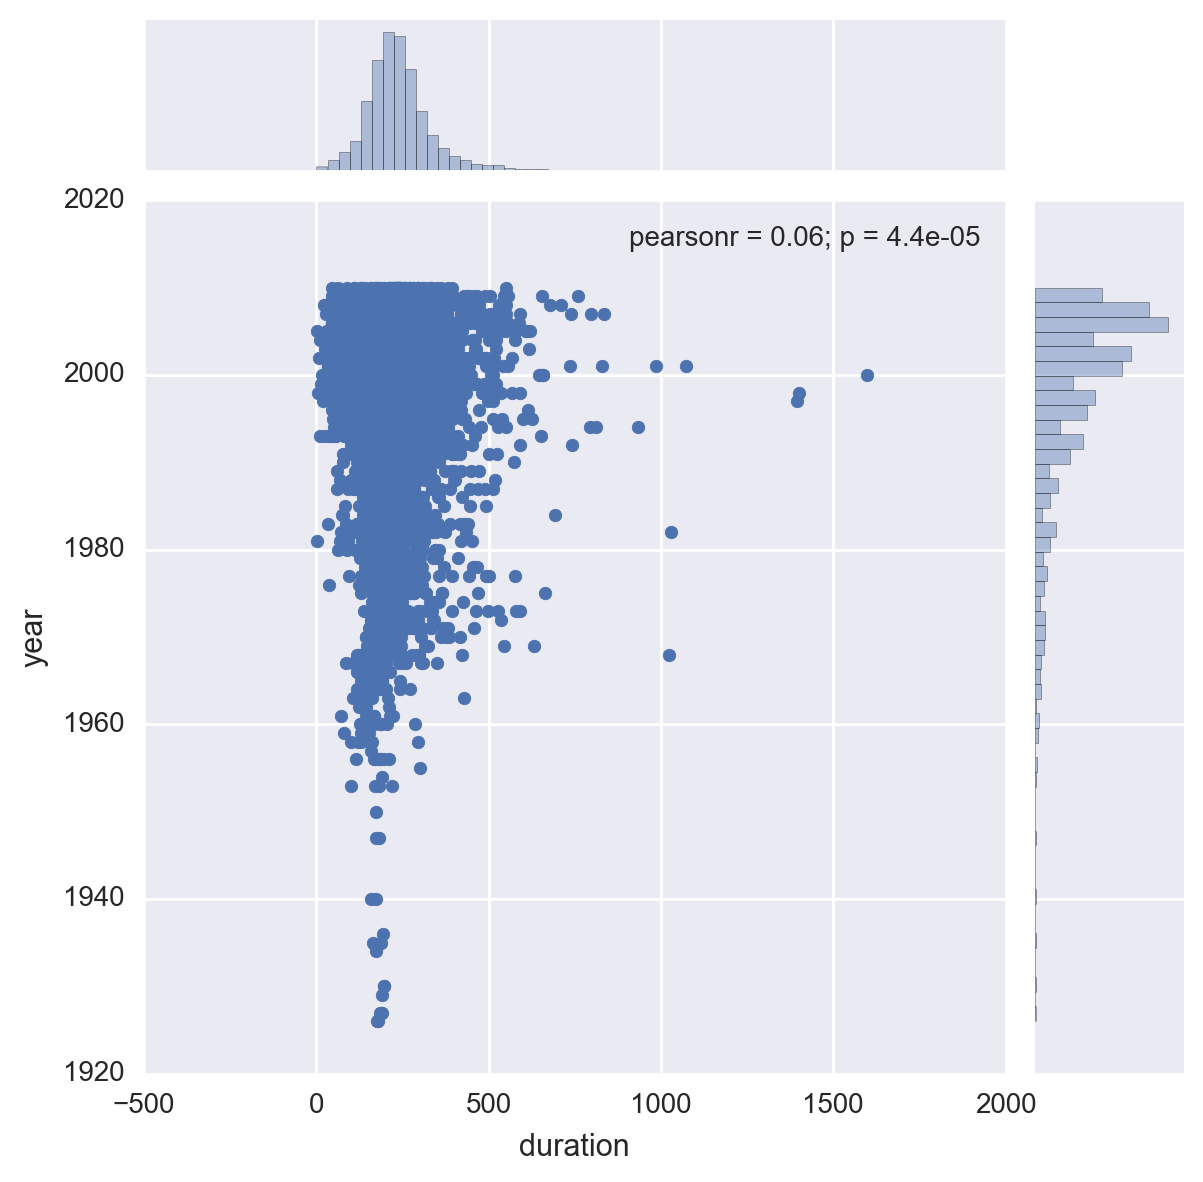

In [82]:
sns.jointplot(df_year['duration'], df_year['year'])

# Lyric EDA

In [387]:
df_lyric_metadata['popularity'] = df_lyric_metadata['artist_hotttnesss'].map(lambda x: 1 if x >= .6 else 0)
df_lyric_metadata['familiarity'] = df_lyric_metadata['artist_familiarity'].map(lambda x: 1 if x >= .8 else 0)

In [388]:
song_cols_del = ['track_id', 'title', 'song_id', 'release', 'artist_id', 'artist_mbid', 
              'artist_name', 'duration', 'year_x', 'artist_familiarity', 'artist_hotttnesss']

In [389]:
df_lyric_metadata = df_lyric_metadata.drop(song_cols_del, axis=1)

In [390]:
###Removing any non ascii characters/features from the dataframe
lyric_columns = del_cols_lyric(df_lyric_metadata)

In [391]:
##Drop the columns that don't have ascii characters
df_lyric_metadata = df_lyric_metadata.drop(lyric_columns, axis=1)

In [392]:
##Find stop words in columns
stop_cols = del_stopwords(df_lyric_metadata)

In [393]:
##Delete stop words from dataset
df_lyric_metadata = df_lyric_metadata.drop(stop_cols, axis=1)

In [394]:
#Remove popularity and familiarity to look at only words
df_words = df_lyric_metadata.drop(['popularity', 'familiarity'], axis=1)

In [ ]:
####Remove any columns that don't have any value/counts to the songs

In [395]:
df_words[df_words.columns].sum().sort_values(ascending=True).head(5)

cu          0
sig         0
saben       0
rocknrol    0
coraz       0
dtype: int64

In [396]:
###Don't want any lyrics that had a count of less than 5
cols = list(df_words.columns.values)
cols_use, cols_del = [], []
for x in cols:
    if df_words[x].sum() > 5:
        cols_use.append(x)
    else:
        cols_del.append(x)

In [398]:
df_words = df_words.drop(cols_del, axis=1)

In [ ]:
##Check if the word is in the english language

In [401]:
e_dict = enchant.Dict("en_US")

In [402]:
cols_dict = list(df_words.columns.values)
cols_use_dict, cols_del_dict = [], []
for x in cols_dict:
    if e_dict.check(x) == True:
        cols_use_dict.append(x)
    else:
        cols_del_dict.append(x)

In [405]:
df_words = df_words.drop(cols_del_dict, axis=1)

In [ ]:
###Take the word count around the average and a standard deviation away from the mean
###Basically, chopping off the ends of the dataset

In [406]:
df_test_columns = df_words[df_words.columns].sum().sort_values(ascending=False)

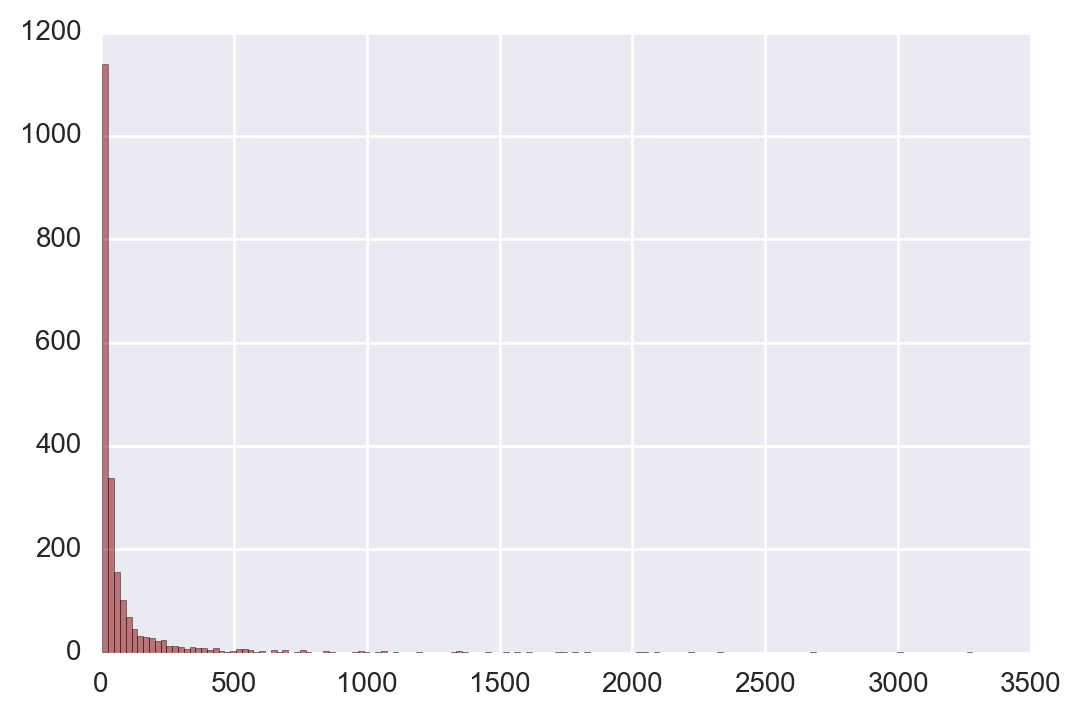

In [407]:
df_test_columns.hist(bins=150, alpha=.5, color='darkred')

In [408]:
df_test_columns.describe()

count    2152.000000
mean       92.313197
std       235.384040
min         6.000000
25%        12.000000
50%        25.000000
75%        69.000000
max      3280.000000
dtype: float64

In [409]:
###Take the middle 50% of the column values (one standard deviation from the mean) - in order
###to pick features that are more unique across the various artists
cols = list(df_words.columns.values)
cols_use, cols_del = [], []
for x in cols:
    if df_words[x].sum() >= 40 and df_words[x].sum() <= 300:
        cols_use.append(x)
    else:
        cols_del.append(x)

In [410]:
df_words = df_words.drop(cols_del, axis=1)

# TFIDF of Lyrics

In [412]:
tfidf = TfidfTransformer()

In [413]:
X_tfidf = tfidf.fit_transform(df_words)

In [415]:
x_df_tfidf = pd.DataFrame(X_tfidf.todense(), columns=df_words.columns)

In [416]:
tf_df_tfidf = pd.DataFrame(x_df_tfidf.mean(), columns=["freq"])

In [417]:
title  =  "Frequency - Top 20: %s, Stopwords: %s" % ("tfidf", "none")

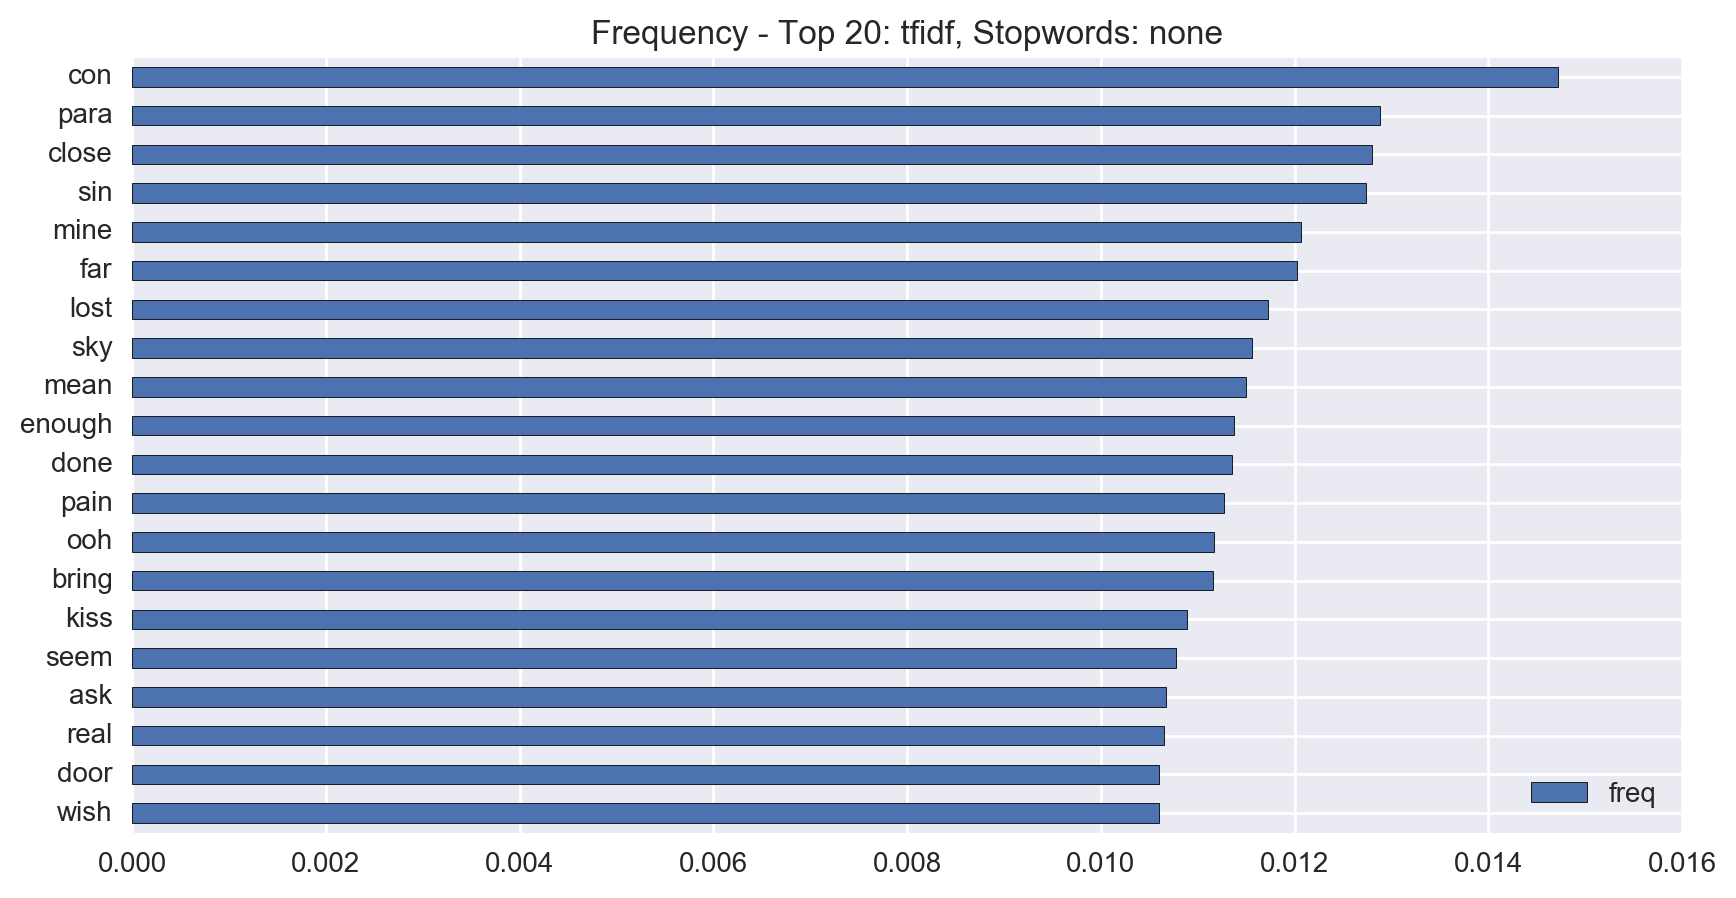

In [418]:
tf_df_tfidf.sort_values("freq").tail(20).plot(kind="barh", title=title, figsize=(10,5))

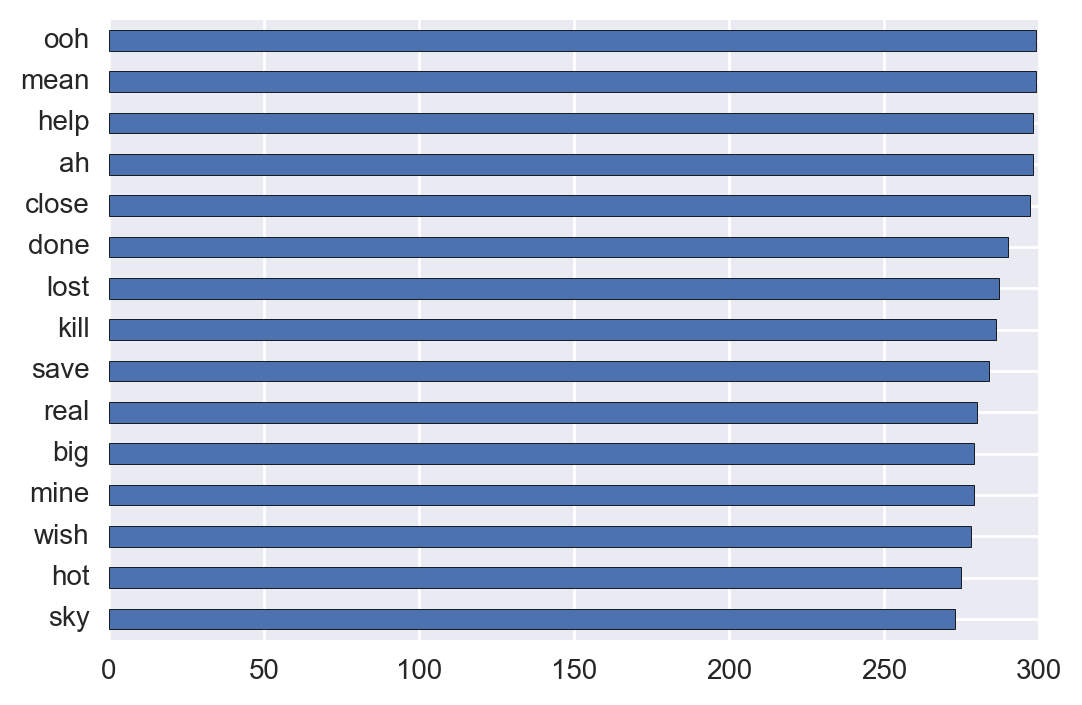

In [424]:
df_words[df_words.columns].sum().sort_values(ascending=True).tail(15).plot(kind='barh')

# Lyric Popularity

In [ ]:
###Look at Popularity first in relation to lyrics
df_lyrics_popularity = df_lyric_updated.drop(pop_cols_del, axis=1)

# 6. Modeling

# Overall Viewpoint

In [158]:
df_genre_comb = pd.merge(df_songs_og, df_genre_wide, how='inner', on='track_id')

In [159]:
df_genre_comb = df_genre_comb[(df_genre_comb['year'] != 0)]

In [160]:
df_genre_comb.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)

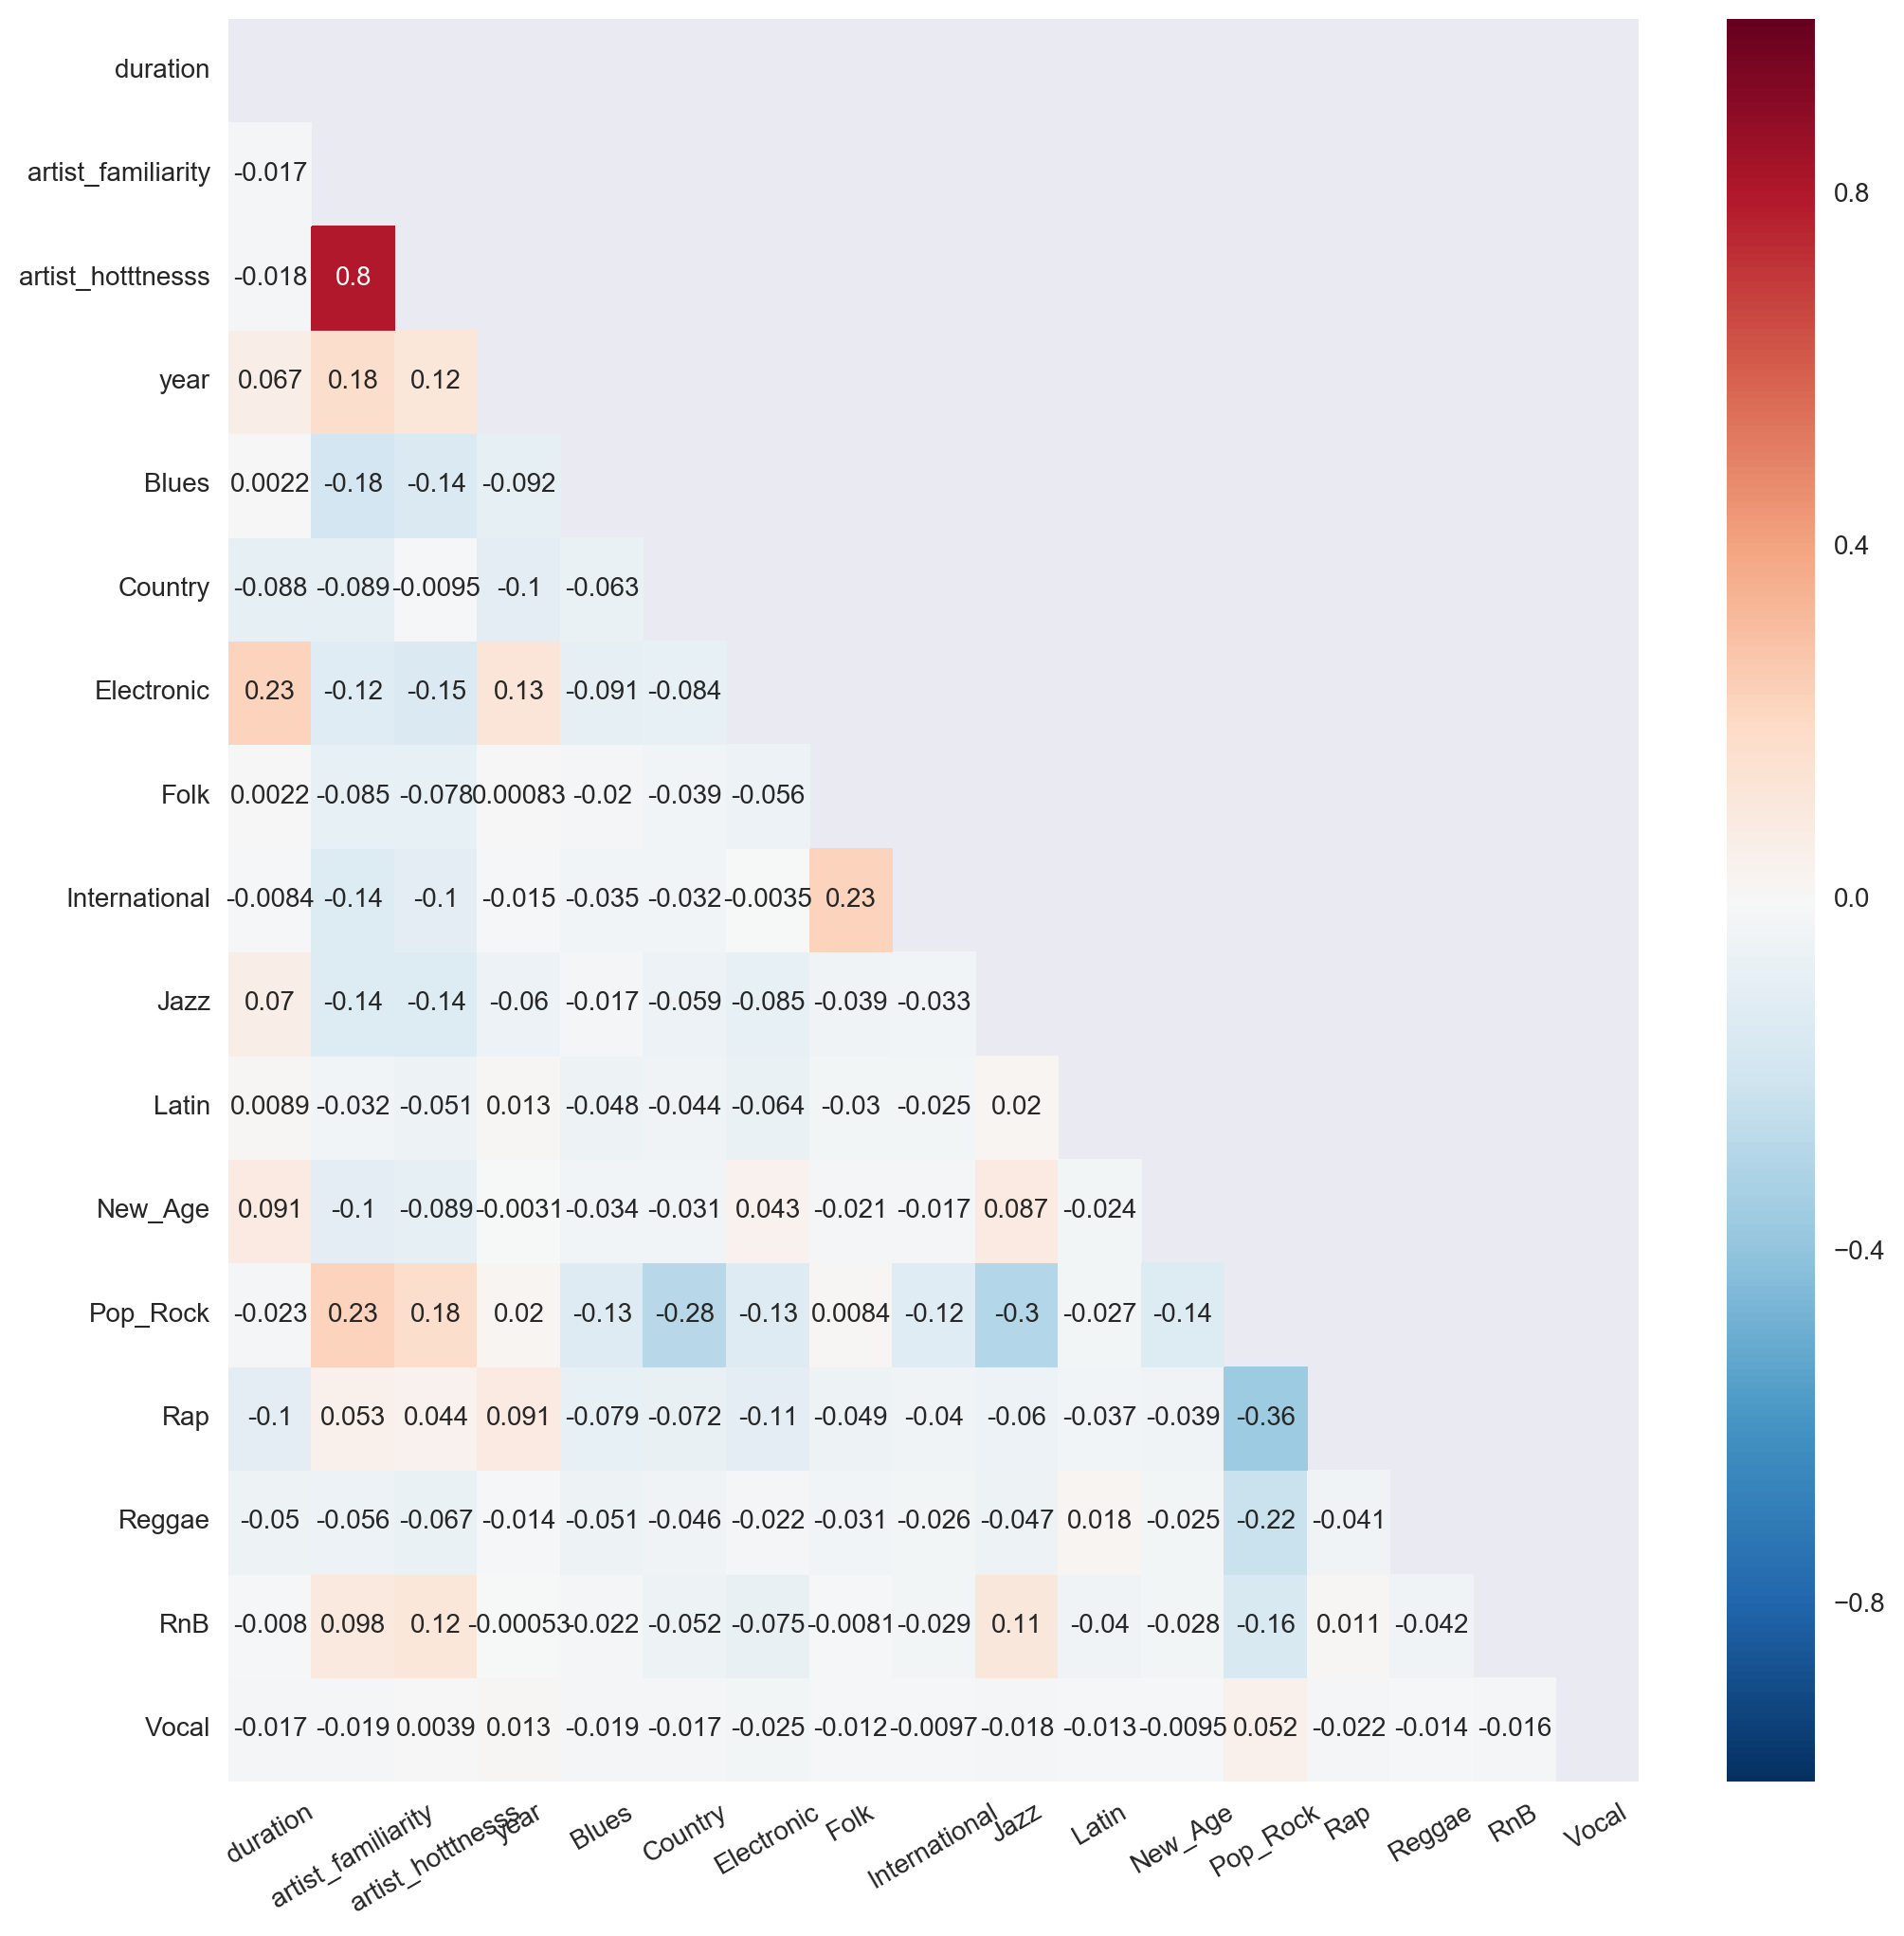

In [164]:
correlation_heat_map(df_genre_comb)

In [165]:
#Chose .6 because the mean + std
df_genre_comb['popular'] = df_genre_comb['artist_hotttnesss'].map(lambda x: 1 if x >= .49 else 0 )
df_genre_comb['familiarity'] = df_genre_comb['artist_familiarity'].map(lambda x: 1 if x >= .68 else 0 )

In [ ]:
remove_cols_pop = ['track_id', 'title', 'song_id', 
               'release', 'artist_id', 'artist_mbid', 
               'artist_name', 'artist_familiarity', 'artist_hotttnesss', 'familiarity']
remove_cols_fam = ['track_id', 'title', 'song_id', 
               'release', 'artist_id', 'artist_mbid', 
               'artist_name', 'artist_familiarity', 'artist_hotttnesss', 'popular']

In [167]:
df_popularity = df_genre_comb.drop(remove_cols_pop, axis=1)
df_familiarity = df_genre_comb.drop(remove_cols_fam, axis=1)

In [170]:
####Able to put column of what I want at the beginning for predicting capabilities
cols = df_popularity.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_popularity = df_popularity[cols]

In [171]:
####Able to put column of what I want at the beginning for predicting capabilities
cols = df_familiarity.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_familiarity = df_familiarity[cols]

In [205]:
ss=StandardScaler()
lrcv_pop = LogisticRegressionCV(Cs=100, solver='liblinear', penalty='l1', cv=5)
lrcv_fam = LogisticRegressionCV(Cs=100, solver='liblinear', penalty='l1', cv=5)

# Overall Genre Popularity

In [222]:
###Use Patsy to predict a logisitc regression
not_predictors_pop = ['popular']
formula_pop = 'popular ~ ' + ' + '.join([x for x in df_pop.columns if x not in not_predictors_pop]) + ' - 1'

In [223]:
y_pop, X_pop = patsy.dmatrices(formula_pop, data=df_popularity, return_type='dataframe')
y_pop = y_pop.values.ravel()

In [224]:
Xn_pop = ss.fit_transform(X_pop)

In [225]:
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(Xn_pop, y_pop, test_size=0.33)

In [226]:
lrcv_pop.fit(X_train_pop, y_train_pop)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [227]:
print 1-np.mean(y_test_pop)
print lrcv_pop.score(X_test_pop, y_test_pop)

0.545212765957
0.678191489362


In [228]:
coefs = pd.DataFrame({'coef':lrcv_pop.coef_[0], 'abs_coef':np.abs(lrcv_pop.coef_[0]),
                      'variable':X.columns})
coefs.sort_values('coef', ascending=False, inplace=True)

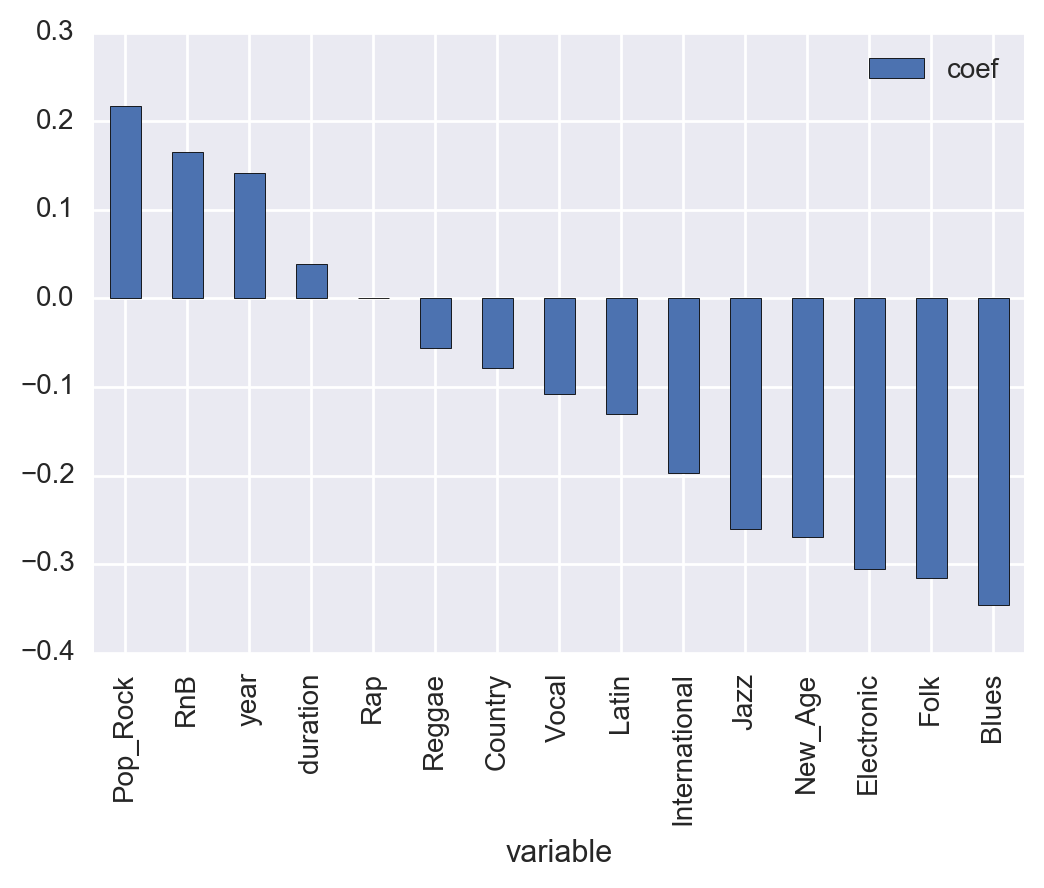

In [242]:
coefs.plot(kind='bar', x='variable', y='coef')

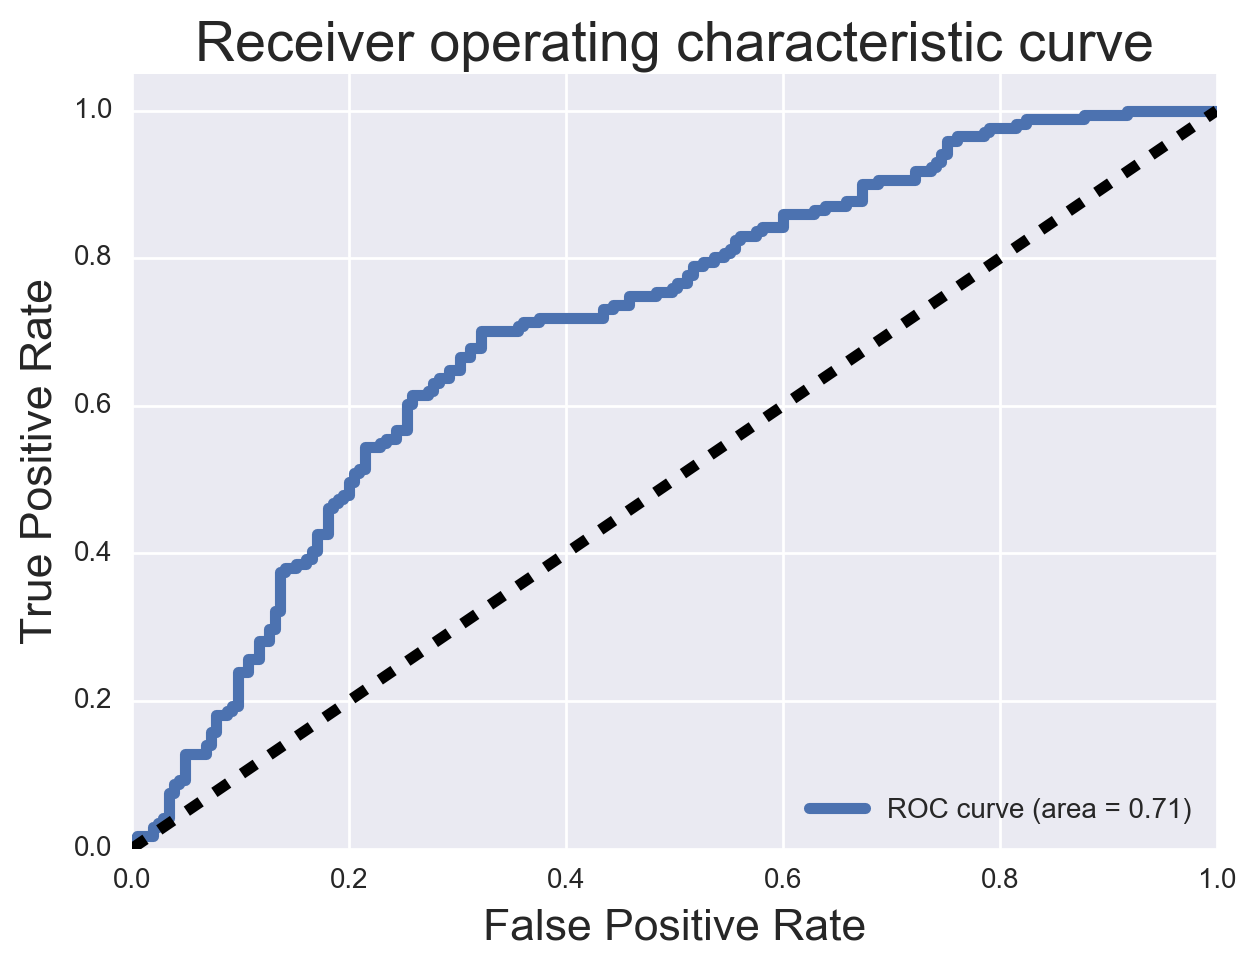

In [352]:
# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_pop.predict_proba(X_test_pop)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test_pop, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Overall Genre Familiarity

In [213]:
###Use Patsy to predict a logisitc regression
not_predictors_fam = ['familiarity']
formula_fam = 'familiarity ~ ' + ' + '.join([x for x in df_fam.columns if x not in not_predictors_fam]) + ' - 1'

In [230]:
y_fam, X_fam = patsy.dmatrices(formula_fam, data=df_familiarity, return_type='dataframe')
y_fam = y_fam.values.ravel()

In [231]:
Xn_fam = ss.fit_transform(X_fam)

In [232]:
X_train_fam, X_test_fam, y_train_fam, y_test_fam = train_test_split(Xn_fam, y_fam, test_size=0.33)

In [233]:
lrcv_fam.fit(X_train_fam, y_train_fam)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [234]:
print 1-np.mean(y_test_fam)
print lrcv_fam.score(X_test_fam, y_test_fam)

0.478723404255
0.696808510638


In [235]:
coefs_fam = pd.DataFrame({'coef':lrcv_fam.coef_[0], 'abs_coef':np.abs(lrcv_fam.coef_[0]),
                      'variable':X.columns})
coefs_fam.sort_values('coef', ascending=False, inplace=True)

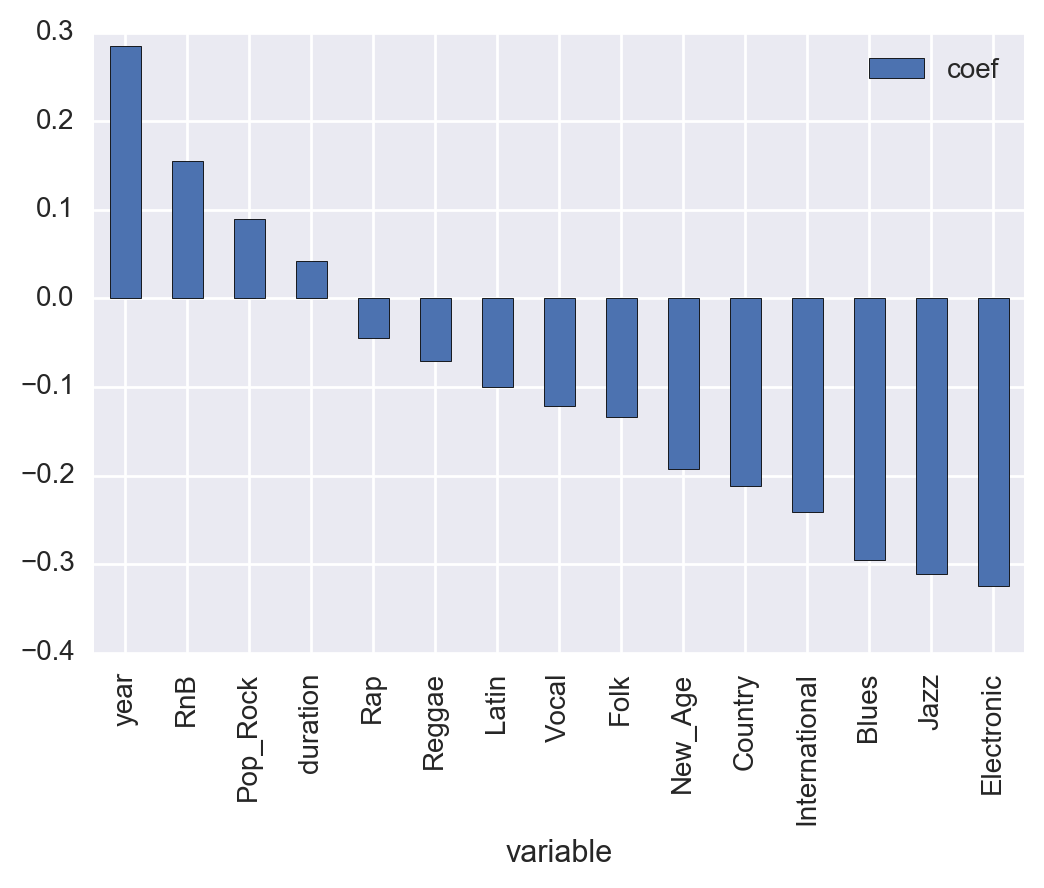

In [241]:
coefs_fam.plot(kind='bar', x='variable', y='coef')

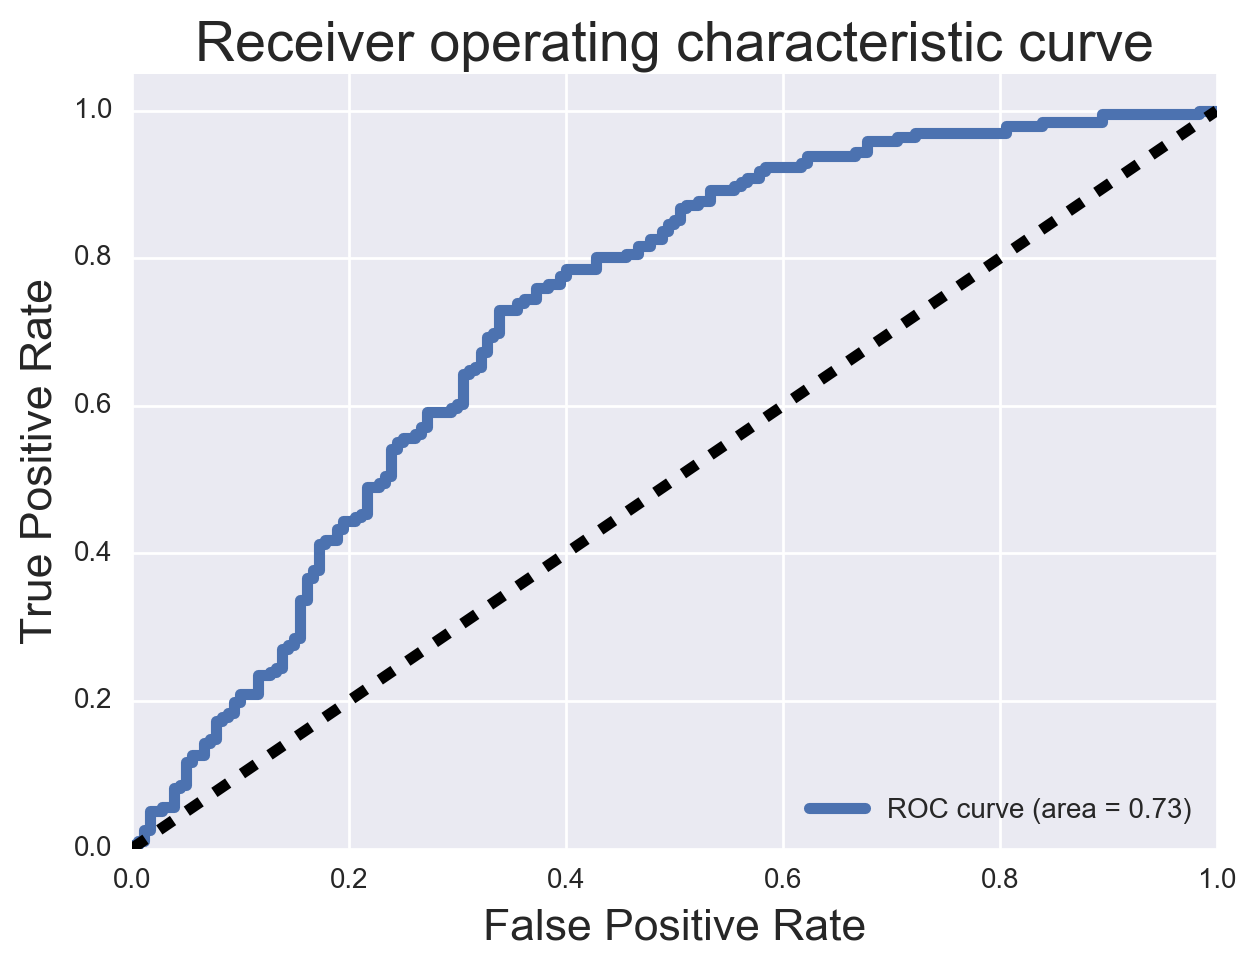

In [351]:
# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_fam.predict_proba(X_test_fam)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test_fam, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Top Tags for Combined genre data set

In [262]:
#Remove unwanted columns from the combined tag dataframe for regression

# Remvoing any non ascii characters/features

tags_combo_columns = del_cols(df_tags_comb)
df_tags_comb = df_tags_comb.drop(tags_combo_columns, axis=1)

In [263]:
# Remove any non-zero years
df_tags_comb = df_tags_comb[(df_tags_comb['year'] != 0)]

In [265]:
#Chose .6 because the mean + std
df_tags_comb['popular'] = df_tags_comb['artist_hotttnesss'].map(lambda x: 1 if x >= .61 else 0 )
df_tags_comb['familiarity'] = df_tags_comb['artist_familiarity'].map(lambda x: 1 if x >= .8 else 0 )

In [267]:
remove_cols_tag_pop = ['track_id', 'title', 'song_id', 
               'release', 'artist_id', 'artist_mbid', 
               'artist_name', 'artist_familiarity', 'artist_hotttnesss', 'familiarity']
remove_cols_tag_fam = ['track_id', 'title', 'song_id', 
               'release', 'artist_id', 'artist_mbid', 
               'artist_name', 'artist_familiarity', 'artist_hotttnesss', 'popular']

In [268]:
df_tag_popularity = df_tags_comb.drop(remove_cols_tag_pop, axis=1)
df_tag_familiarity = df_tags_comb.drop(remove_cols_tag_fam, axis=1)

In [270]:
####Able to put column of what I want at the beginning for predicting capabilities
cols = df_tag_popularity.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_tag_popularity = df_tag_popularity[cols]

In [269]:
####Able to put column of what I want at the beginning for predicting capabilities
cols = df_tag_familiarity.columns.tolist()
cols = cols[-1:] + cols[:-1]
df_tag_familiarity = df_tag_familiarity[cols]

In [271]:
ss=StandardScaler()
lrcv_tag_pop = LogisticRegressionCV(Cs=100, solver='liblinear', penalty='l1', cv=5)
lrcv_tag_fam = LogisticRegressionCV(Cs=100, solver='liblinear', penalty='l1', cv=5)

# Tags Popularity

In [273]:
###Start to model the data frame for hotttness based on a linear regression
y = df_tag_popularity['popular'].values
X = df_tag_popularity.iloc[:,1:]

In [276]:
Xn_pop = ss.fit_transform(X)

In [277]:
X_train, X_test, y_train, y_test = train_test_split(Xn_pop, y, test_size=0.33)

In [278]:
#Fit the logestic model basedon the parameters
lrcv_tag_pop.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [279]:
print 1-np.mean(y_test)
print lrcv_tag_pop.score(X_test, y_test)

0.864066193853
0.893617021277


In [280]:
coefs_tag_pop = pd.DataFrame({'coef':lrcv_tag_pop.coef_[0], 'abs_coef':np.abs(lrcv_tag_pop.coef_[0]),
                      'variable':X.columns})
coefs_tag_pop.sort_values('coef', ascending=False, inplace=True)

In [282]:
coefs_tag_pop.head()

,abs_coef,coef,variable
77,0.681629,0.681629,mbtag_melodic_hardcore
71,0.647443,0.647443,mbtag_irish
94,0.597768,0.597768,mbtag_producer
56,0.594254,0.594254,mbtag_glam_metal
22,0.532019,0.532019,mbtag_chanteur


In [283]:
coefs_tag_pop.tail()

,abs_coef,coef,variable
20,0.604613,-0.604613,mbtag_canada
183,0.627282,-0.627282,term_punk_revival
167,0.667749,-0.667749,term_melodic_rock
7,0.749023,-0.749023,mbtag_alternative_hip-hop
140,1.183940,-1.183940,term_east_coast_hip_hop


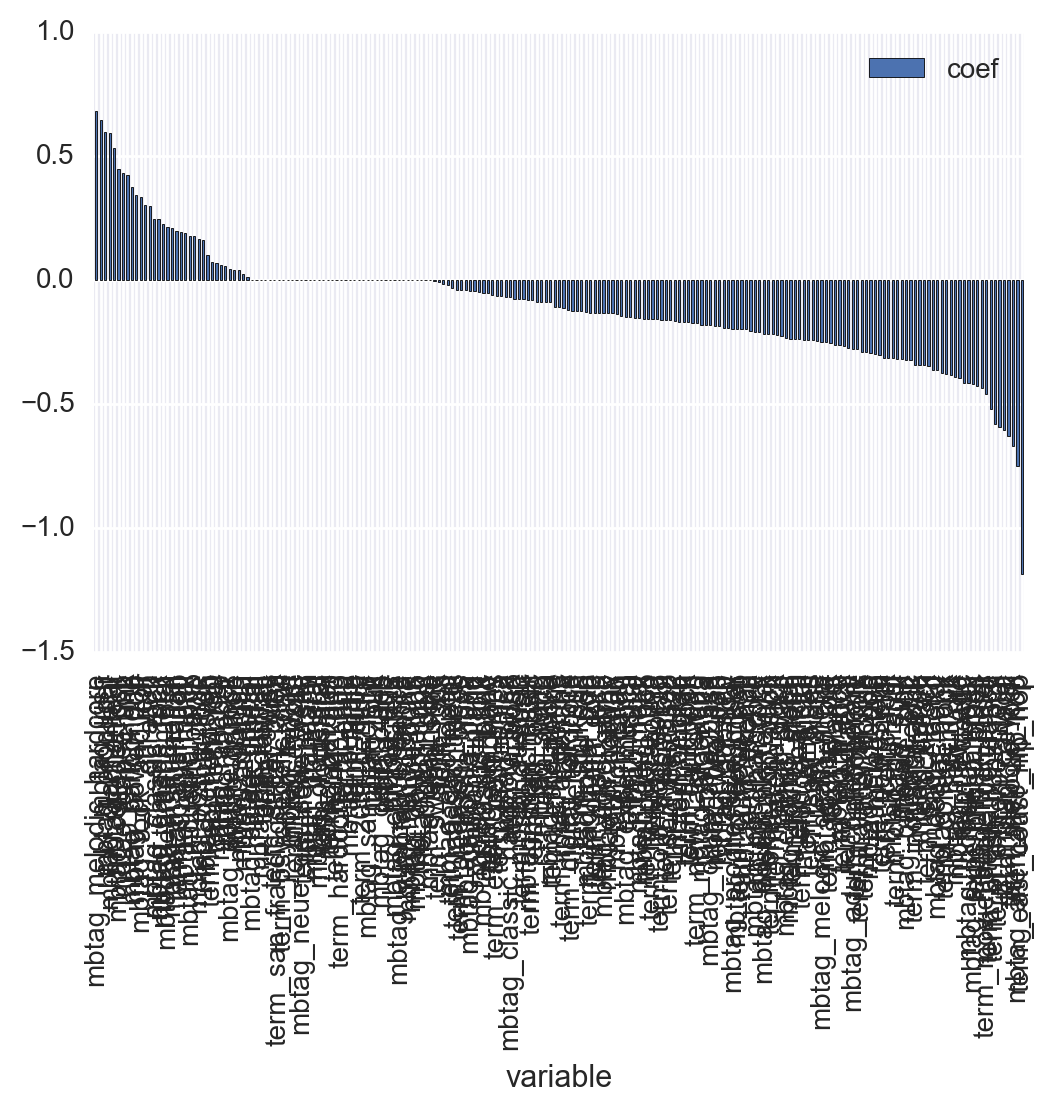

In [285]:
coefs_tag_pop.plot(kind='bar', x='variable', y='coef')

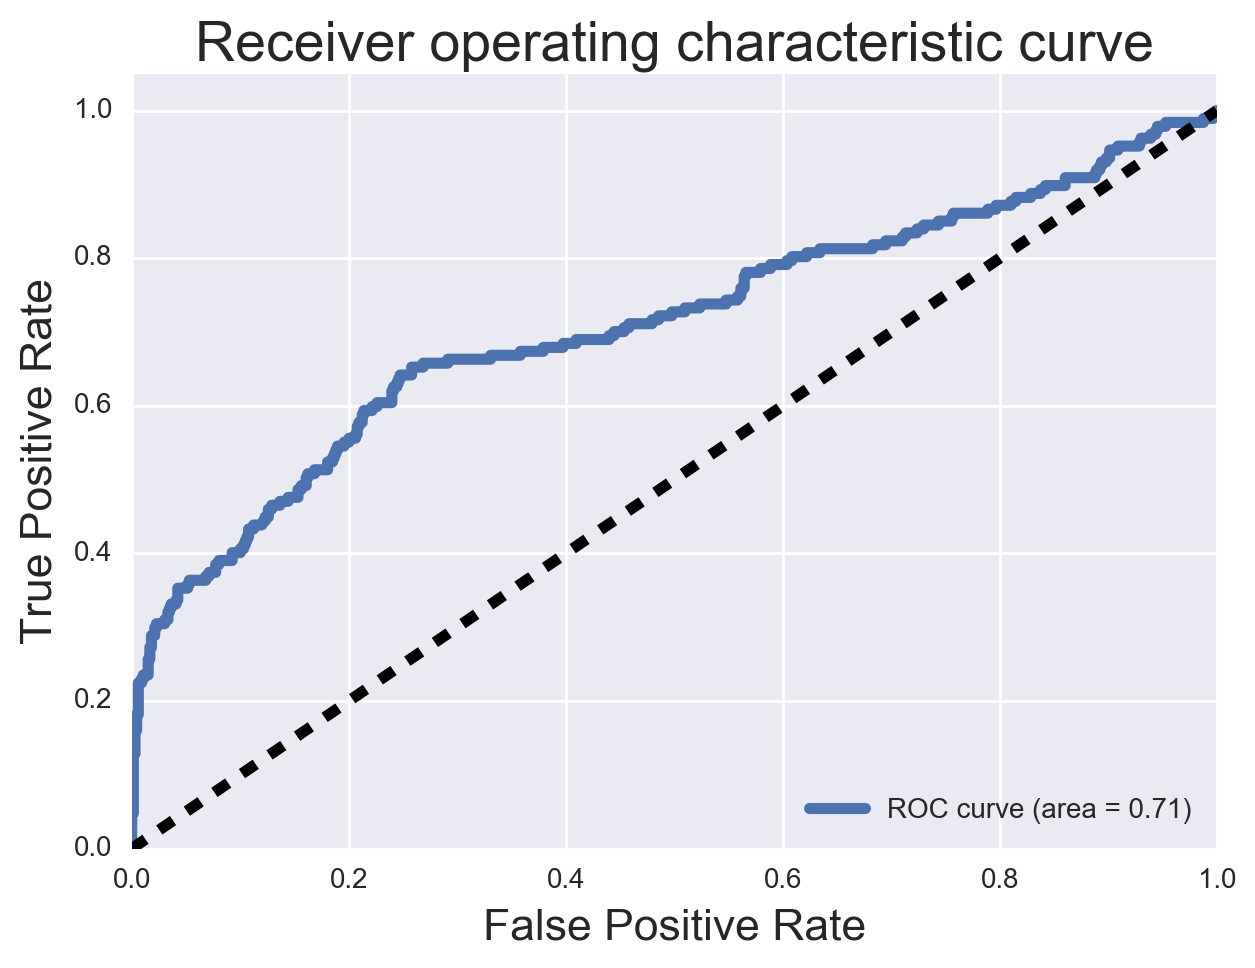

In [348]:
from sklearn.metrics import roc_curve, auc

# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_tag_pop.predict_proba(X_test)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Tags Familiarity

In [287]:
###Start to model the data frame for hotttness based on a linear regression
y = df_tag_familiarity['familiarity'].values
X = df_tag_familiarity.iloc[:,1:]

In [288]:
Xn_fam = ss.fit_transform(X)

In [289]:
X_train, X_test, y_train, y_test = train_test_split(Xn_fam, y, test_size=0.33)

In [290]:
#Fit the logestic model basedon the parameters
lrcv_tag_fam.fit(X_train, y_train)

LogisticRegressionCV(Cs=100, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
           refit=True, scoring=None, solver='liblinear', tol=0.0001,
           verbose=0)

In [291]:
print 1-np.mean(y_test)
print lrcv_tag_fam.score(X_test, y_test)

0.778959810875
0.859338061466


In [292]:
coefs_tag_fam = pd.DataFrame({'coef':lrcv_tag_fam.coef_[0], 'abs_coef':np.abs(lrcv_tag_fam.coef_[0]),
                      'variable':X.columns})
coefs_tag_fam.sort_values('coef', ascending=False, inplace=True)

In [293]:
coefs_tag_fam.head()

,abs_coef,coef,variable
55,5.021099,5.021099,mbtag_garage_rock
84,4.464803,4.464803,mbtag_nu_metal
82,3.766270,3.766270,mbtag_new_metal
90,3.372946,3.372946,mbtag_post-grunge
77,3.166682,3.166682,mbtag_melodic_hardcore


In [294]:
coefs_tag_fam.tail()

,abs_coef,coef,variable
207,1.494282,-1.494282,term_western
184,1.859489,-1.859489,term_quiet_storm
135,1.928015,-1.928015,term_digital_hardcore
123,2.547047,-2.547047,term_british_punk_rock
11,2.882350,-2.882350,mbtag_australian


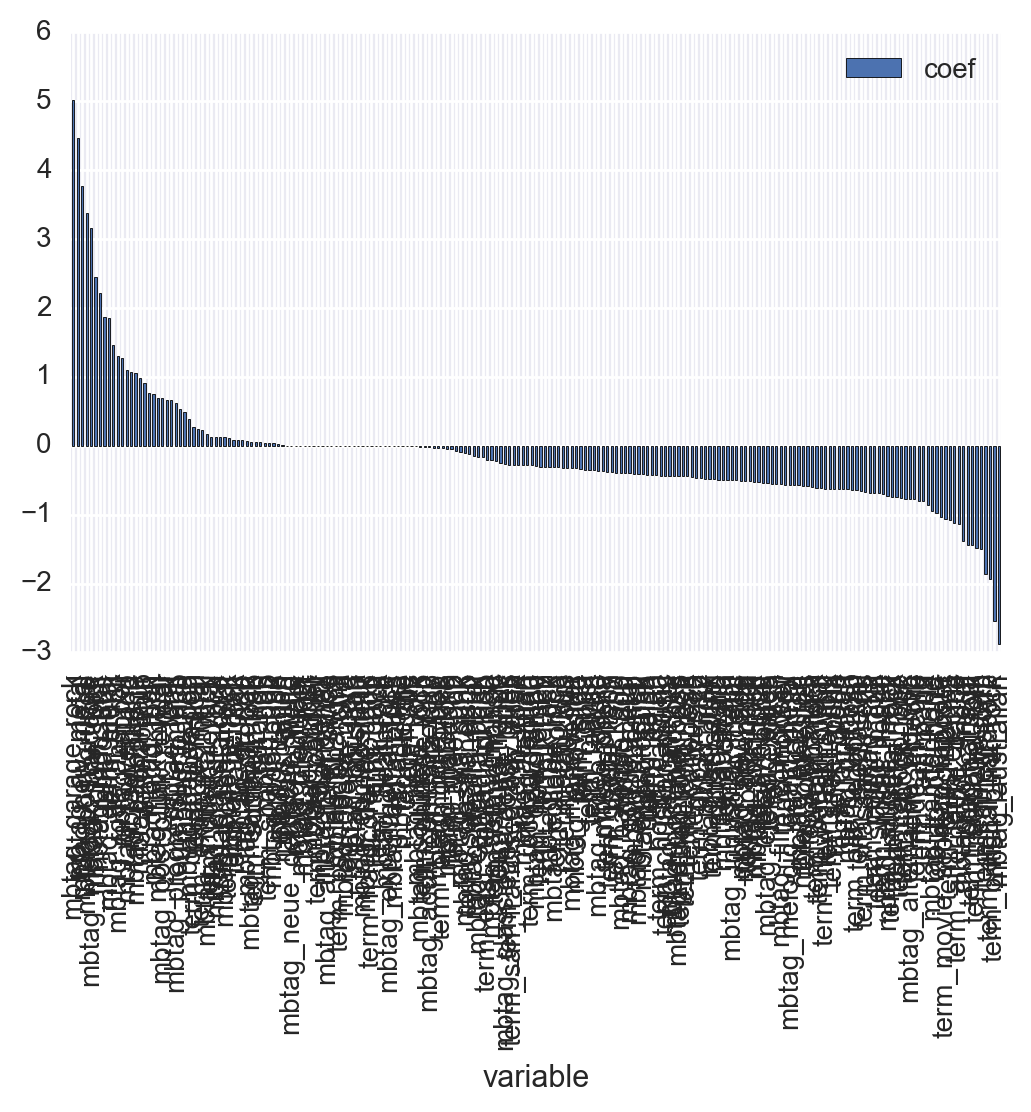

In [295]:
coefs_tag_fam.plot(kind='bar', x='variable', y='coef')

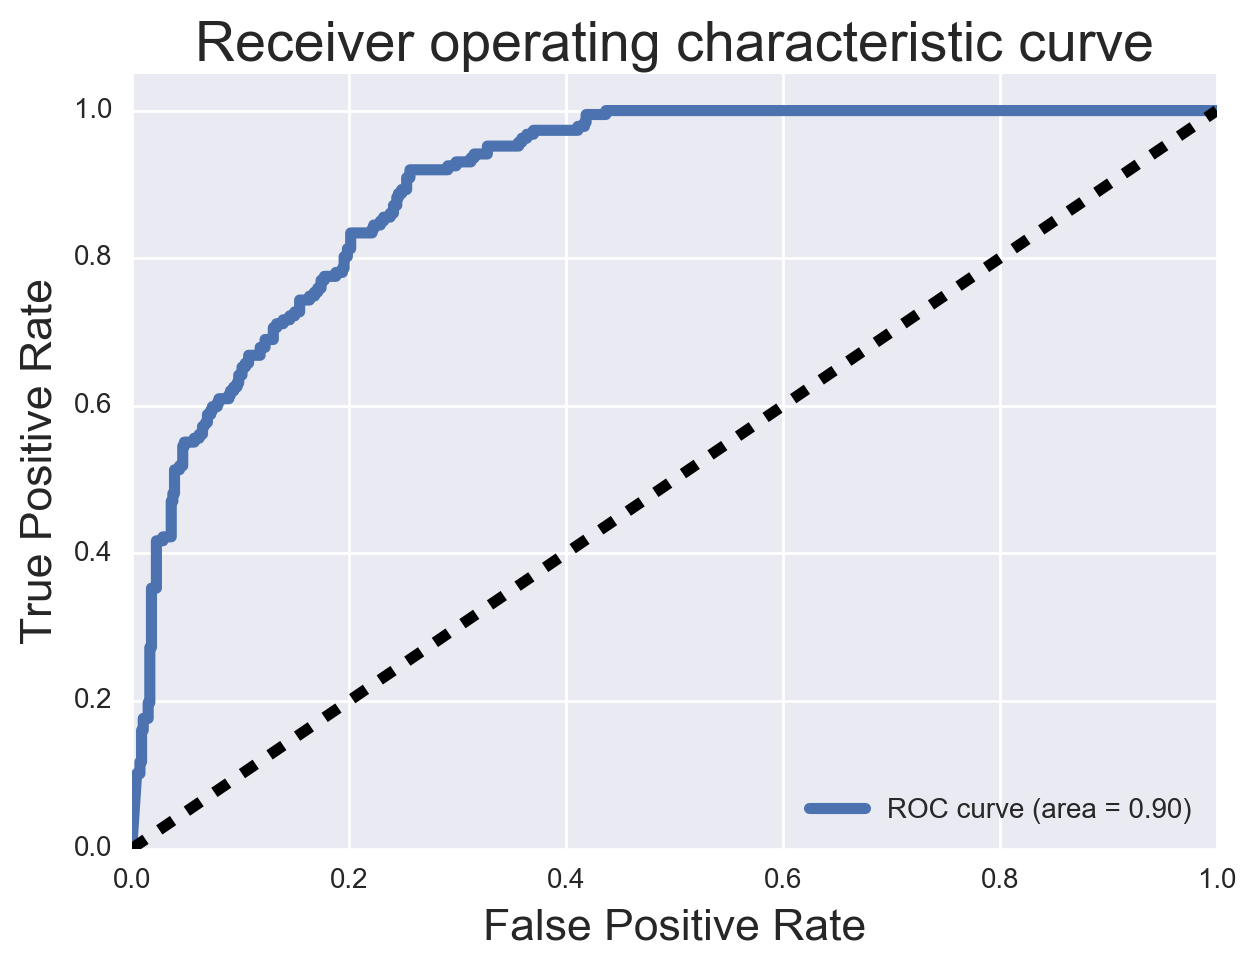

In [353]:
# Get out the predicted probabilities for the X observation matrix
y_pp = lrcv_tag_fam.predict_proba(X_test)

# roc_curve returns the false positive rate and true positive rates as the threshold changes
# takes in the y and the predicted probabilities of the positive class from your model.
fpr, tpr, _ = roc_curve(y_test, y_pp[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=[7,5])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver operating characteristic curve', fontsize=20)
plt.legend(loc="lower right")
plt.show()

# Check that sub-genres are part of genres

In [332]:
df_genre_check = pd.merge(df_songs_og, df_genre_og, how='inner', on='track_id')
df_genre_check = pd.merge(df_genre_check, df_mbtag_og, how='inner', on='artist_id')

In [333]:
df_genre_check = df_genre_check.groupby(['genre_A', 'mbtag']).count().reset_index()

In [334]:
df_genre_check

,genre_A,mbtag,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,genre_value,values
0,Blues,60s,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Blues,acid rock,1,1,1,1,1,1,1,1,1,1,1,1,1
2,Blues,american,5,5,5,5,5,5,5,5,5,5,5,5,5
3,Blues,black metal,1,1,1,1,1,1,1,1,1,1,1,1,1
4,Blues,blues,14,14,14,14,14,14,14,14,14,14,14,14,14
5,Blues,blues rock,8,8,8,8,8,8,8,8,8,8,8,8,8
6,Blues,britannique,1,1,1,1,1,1,1,1,1,1,1,1,1
7,Blues,british,3,3,3,3,3,3,3,3,3,3,3,3,3
8,Blues,british blues,1,1,1,1,1,1,1,1,1,1,1,1,1
9,Blues,chicago blues,3,3,3,3,3,3,3,3,3,3,3,3,3


In [347]:
df_genre_check.sort_values('track_id',ascending=False).head(15)

,genre_A,mbtag,track_id,title,song_id,release,artist_id,artist_mbid,artist_name,duration,artist_familiarity,artist_hotttnesss,year,genre_value,values
612,Pop_Rock,rock,220,220,220,220,220,220,220,220,220,220,220,220,220
350,Pop_Rock,american,154,154,154,154,154,154,154,154,154,154,154,154,154
403,Pop_Rock,classic pop and rock,138,138,138,138,138,138,138,138,138,138,138,138,138
613,Pop_Rock,rock and indie,128,128,128,128,128,128,128,128,128,128,128,128,128
387,Pop_Rock,british,112,112,112,112,112,112,112,112,112,112,112,112,112
681,Pop_Rock,uk,104,104,104,104,104,104,104,104,104,104,104,104,104
687,Pop_Rock,usa,92,92,92,92,92,92,92,92,92,92,92,92,92
449,Pop_Rock,english,85,85,85,85,85,85,85,85,85,85,85,85,85
348,Pop_Rock,alternative rock,82,82,82,82,82,82,82,82,82,82,82,82,82
580,Pop_Rock,pop and chart,72,72,72,72,72,72,72,72,72,72,72,72,72


In [ ]:
###Extra

#Show the loss of data from combinging the data
#df_lyric_metadata.shape
#df_lyric_genre_metadata.shape

#Show better distribution graphs

#Spell Check

#Precision Recall - Confusion Matrix

#Bokai graphing or the one from the guys project

#Add sublime code for the lyric scraping